#**Deep Impute** 

#Data: Atlas of human blood dendritic cells and monocytes

Implementation pipeline of Deep Impute model from scdeep package The pipline consists of the foloowing :
1. Loading the data and building a AnnData from the counts data and metadata
2. Preprocessing(quality filtering) and training the Deep Impute model
3. Comapring the quality of data before and after the application of model
4. Down stream Analysis - PCA, tSNE, UMAP, Clustering analysis
5. Additional visualizations

In [ ]:
!pip install scdeep

In [ ]:
!pip install -q scanpy

     |████████████████████████████████| 7.2MB 4.9MB/s 
     |████████████████████████████████| 122kB 58.3MB/s 
     |████████████████████████████████| 51kB 8.2MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
cd 'drive/My Drive/BL uploads'

/content/drive/My Drive/BL uploads


In [ ]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
%matplotlib inline 
import scdeep

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
count_dataframe = pd.read_csv('expression_matrix_tpm.txt', sep="\t", header=0, index_col=0) 
cd=count_dataframe.T

In [ ]:
metadata_dataframe = pd.read_csv('metadata.txt', sep="\t", header=0,index_col=0)
metadata_dataframe=metadata_dataframe[1:]
metadata_dataframe.index=cd.index

# Constructing AnnData using the two csv files


In [ ]:
adata = sc.AnnData(X = cd, obs = metadata_dataframe)

In [ ]:
adata.shape

(1078, 26593)

In [ ]:
adata.X #expression matrix

array([[0.       , 0.       , 0.       , ..., 4.292512 , 3.439777 ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 1.856298 ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 4.018183 , 3.940999 ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 1.6919391, 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 5.3807263, 3.9023767,
        0.       ],
       [0.       , 0.       , 0.       , ..., 5.087905 , 3.7857792,
        0.       ]], dtype=float32)

In [ ]:
from scdeep import deep_impute
from scdeep import scScope

In [ ]:
gene_matrix = pd.DataFrame(adata.X)
model = deep_impute.DeepImputeModel()
gene_dataset = scdeep.dataset.GeneExpressionDataset()

In [ ]:
gene_dataset.from_data(gene_matrix)
trainer = deep_impute.DeepImputeTrainer(model=model, gene_dataset=gene_dataset, batch_size=64)

Network 0: 1736 predictors, 512 targets
Network 1: 1640 predictors, 512 targets
Network 2: 1606 predictors, 512 targets
Network 3: 1662 predictors, 512 targets
Network 4: 1554 predictors, 512 targets
Network 5: 1545 predictors, 512 targets
Network 6: 1598 predictors, 512 targets
Network 7: 1580 predictors, 512 targets
Network 8: 1669 predictors, 512 targets
Network 9: 1538 predictors, 512 targets
Network 10: 1607 predictors, 512 targets
Network 11: 1574 predictors, 512 targets
Network 12: 1619 predictors, 512 targets
Network 13: 1604 predictors, 512 targets
Network 14: 1519 predictors, 512 targets
Network 15: 1626 predictors, 512 targets
Network 16: 1591 predictors, 512 targets
Network 17: 1644 predictors, 512 targets
Network 18: 1468 predictors, 512 targets
Network 19: 1556 predictors, 512 targets


training:   0%|          | 0/100 [00:00<?, ?it/s]

module_list.0.dense_layer.weight
torch.Size([256, 1625])
module_list.0.dense_layer.bias
torch.Size([256])
module_list.0.output_layer.weight
torch.Size([512, 256])
module_list.0.output_layer.bias
torch.Size([512])
module_list.1.dense_layer.weight
torch.Size([256, 1646])
module_list.1.dense_layer.bias
torch.Size([256])
module_list.1.output_layer.weight
torch.Size([512, 256])
module_list.1.output_layer.bias
torch.Size([512])
module_list.2.dense_layer.weight
torch.Size([256, 1612])
module_list.2.dense_layer.bias
torch.Size([256])
module_list.2.output_layer.weight
torch.Size([512, 256])
module_list.2.output_layer.bias
torch.Size([512])
module_list.3.dense_layer.weight
torch.Size([256, 1537])
module_list.3.dense_layer.bias
torch.Size([256])
module_list.3.output_layer.weight
torch.Size([512, 256])
module_list.3.output_layer.bias
torch.Size([512])
module_list.4.dense_layer.weight
torch.Size([256, 1618])
module_list.4.dense_layer.bias
torch.Size([256])
module_list.4.output_layer.weight
torch.Si

training:   1%|          | 1/100 [00:03<05:11,  3.15s/it]

Iteration: 26 Loss: 0.2481

Validation Loss: 0.1853


Epoch: 2

Iteration: 0 Loss: 0.2154
Iteration: 1 Loss: 0.2140
Iteration: 2 Loss: 0.1947
Iteration: 3 Loss: 0.2021
Iteration: 4 Loss: 0.2049
Iteration: 5 Loss: 0.1978
Iteration: 6 Loss: 0.1873
Iteration: 7 Loss: 0.1733
Iteration: 8 Loss: 0.1759
Iteration: 9 Loss: 0.1711
Iteration: 10 Loss: 0.1637
Iteration: 11 Loss: 0.1612
Iteration: 12 Loss: 0.1542
Iteration: 13 Loss: 0.1647
Iteration: 14 Loss: 0.1480
Iteration: 15 Loss: 0.1460
Iteration: 16 Loss: 0.1426
Iteration: 17 Loss: 0.1547
Iteration: 18 Loss: 0.1375
Iteration: 19 Loss: 0.1420
Iteration: 20 Loss: 0.1333
Iteration: 21 Loss: 0.1409
Iteration: 22 Loss: 0.1438
Iteration: 23 Loss: 0.1340
Iteration: 24 Loss: 0.1377


training:   2%|▏         | 2/100 [00:05<04:56,  3.02s/it]

Iteration: 25 Loss: 0.1222
Iteration: 26 Loss: 0.1278

Validation Loss: 0.0875


Epoch: 3

Iteration: 0 Loss: 0.1233
Iteration: 1 Loss: 0.1243
Iteration: 2 Loss: 0.1187
Iteration: 3 Loss: 0.1212
Iteration: 4 Loss: 0.1211
Iteration: 5 Loss: 0.1293
Iteration: 6 Loss: 0.1146
Iteration: 7 Loss: 0.1127
Iteration: 8 Loss: 0.1223
Iteration: 9 Loss: 0.1054
Iteration: 10 Loss: 0.1133
Iteration: 11 Loss: 0.1030
Iteration: 12 Loss: 0.1078
Iteration: 13 Loss: 0.1103
Iteration: 14 Loss: 0.1081
Iteration: 15 Loss: 0.1010
Iteration: 16 Loss: 0.1086
Iteration: 17 Loss: 0.1152
Iteration: 18 Loss: 0.1054
Iteration: 19 Loss: 0.1040
Iteration: 20 Loss: 0.1048
Iteration: 21 Loss: 0.1006
Iteration: 22 Loss: 0.1106
Iteration: 23 Loss: 0.1011
Iteration: 24 Loss: 0.0986
Iteration: 25 Loss: 0.1013


training:   3%|▎         | 3/100 [00:08<04:44,  2.94s/it]

Iteration: 26 Loss: 0.0997

Validation Loss: 0.0663


Epoch: 4

Iteration: 0 Loss: 0.0966
Iteration: 1 Loss: 0.1070
Iteration: 2 Loss: 0.0974
Iteration: 3 Loss: 0.0956
Iteration: 4 Loss: 0.0960
Iteration: 5 Loss: 0.1004
Iteration: 6 Loss: 0.0916
Iteration: 7 Loss: 0.0931
Iteration: 8 Loss: 0.0873
Iteration: 9 Loss: 0.0985
Iteration: 10 Loss: 0.0928
Iteration: 11 Loss: 0.0998
Iteration: 12 Loss: 0.0944
Iteration: 13 Loss: 0.0875
Iteration: 14 Loss: 0.0944
Iteration: 15 Loss: 0.0941
Iteration: 16 Loss: 0.0917
Iteration: 17 Loss: 0.0923
Iteration: 18 Loss: 0.0952
Iteration: 19 Loss: 0.0947
Iteration: 20 Loss: 0.0877
Iteration: 21 Loss: 0.0900
Iteration: 22 Loss: 0.0868
Iteration: 23 Loss: 0.0845
Iteration: 24 Loss: 0.0899


training:   4%|▍         | 4/100 [00:11<04:37,  2.89s/it]

Iteration: 25 Loss: 0.0908
Iteration: 26 Loss: 0.0879

Validation Loss: 0.0592


Epoch: 5

Iteration: 0 Loss: 0.0893
Iteration: 1 Loss: 0.0807
Iteration: 2 Loss: 0.0897
Iteration: 3 Loss: 0.0831
Iteration: 4 Loss: 0.0894
Iteration: 5 Loss: 0.0982
Iteration: 6 Loss: 0.0840
Iteration: 7 Loss: 0.0912
Iteration: 8 Loss: 0.0861
Iteration: 9 Loss: 0.0846
Iteration: 10 Loss: 0.0828
Iteration: 11 Loss: 0.0937
Iteration: 12 Loss: 0.0849
Iteration: 13 Loss: 0.0857
Iteration: 14 Loss: 0.0857
Iteration: 15 Loss: 0.0816
Iteration: 16 Loss: 0.0818
Iteration: 17 Loss: 0.0769
Iteration: 18 Loss: 0.0815
Iteration: 19 Loss: 0.0765
Iteration: 20 Loss: 0.0763
Iteration: 21 Loss: 0.0790
Iteration: 22 Loss: 0.0834
Iteration: 23 Loss: 0.0766
Iteration: 24 Loss: 0.0817
Iteration: 25 Loss: 0.0876


training:   5%|▌         | 5/100 [00:14<04:29,  2.84s/it]

Iteration: 26 Loss: 0.0790

Validation Loss: 0.0554


Epoch: 6

Iteration: 0 Loss: 0.0790
Iteration: 1 Loss: 0.0852
Iteration: 2 Loss: 0.0867
Iteration: 3 Loss: 0.0833
Iteration: 4 Loss: 0.0772
Iteration: 5 Loss: 0.0797
Iteration: 6 Loss: 0.0788
Iteration: 7 Loss: 0.0791
Iteration: 8 Loss: 0.0780
Iteration: 9 Loss: 0.0846
Iteration: 10 Loss: 0.0752
Iteration: 11 Loss: 0.0815
Iteration: 12 Loss: 0.0784
Iteration: 13 Loss: 0.0794
Iteration: 14 Loss: 0.0783
Iteration: 15 Loss: 0.0760
Iteration: 16 Loss: 0.0784
Iteration: 17 Loss: 0.0779
Iteration: 18 Loss: 0.0725
Iteration: 19 Loss: 0.0768
Iteration: 20 Loss: 0.0704
Iteration: 21 Loss: 0.0744
Iteration: 22 Loss: 0.0771
Iteration: 23 Loss: 0.0776
Iteration: 24 Loss: 0.0807
Iteration: 25 Loss: 0.0682
Iteration: 26 Loss: 0.0774


training:   6%|▌         | 6/100 [00:16<04:24,  2.81s/it]


Validation Loss: 0.0534


Epoch: 7

Iteration: 0 Loss: 0.0778
Iteration: 1 Loss: 0.0707
Iteration: 2 Loss: 0.0806
Iteration: 3 Loss: 0.0687
Iteration: 4 Loss: 0.0741
Iteration: 5 Loss: 0.0789
Iteration: 6 Loss: 0.0766
Iteration: 7 Loss: 0.0725
Iteration: 8 Loss: 0.0787
Iteration: 9 Loss: 0.0719
Iteration: 10 Loss: 0.0706
Iteration: 11 Loss: 0.0727
Iteration: 12 Loss: 0.0716
Iteration: 13 Loss: 0.0753
Iteration: 14 Loss: 0.0746
Iteration: 15 Loss: 0.0751
Iteration: 16 Loss: 0.0746
Iteration: 17 Loss: 0.0702
Iteration: 18 Loss: 0.0779
Iteration: 19 Loss: 0.0724
Iteration: 20 Loss: 0.0700
Iteration: 21 Loss: 0.0757
Iteration: 22 Loss: 0.0713
Iteration: 23 Loss: 0.0818
Iteration: 24 Loss: 0.0711
Iteration: 25 Loss: 0.0735


training:   7%|▋         | 7/100 [00:19<04:20,  2.80s/it]

Iteration: 26 Loss: 0.0684

Validation Loss: 0.0528


Epoch: 8

Iteration: 0 Loss: 0.0720
Iteration: 1 Loss: 0.0710
Iteration: 2 Loss: 0.0737
Iteration: 3 Loss: 0.0717
Iteration: 4 Loss: 0.0726
Iteration: 5 Loss: 0.0664
Iteration: 6 Loss: 0.0689
Iteration: 7 Loss: 0.0761
Iteration: 8 Loss: 0.0711
Iteration: 9 Loss: 0.0697
Iteration: 10 Loss: 0.0704
Iteration: 11 Loss: 0.0770
Iteration: 12 Loss: 0.0698
Iteration: 13 Loss: 0.0685
Iteration: 14 Loss: 0.0701
Iteration: 15 Loss: 0.0719
Iteration: 16 Loss: 0.0744
Iteration: 17 Loss: 0.0714
Iteration: 18 Loss: 0.0681
Iteration: 19 Loss: 0.0667
Iteration: 20 Loss: 0.0692
Iteration: 21 Loss: 0.0685
Iteration: 22 Loss: 0.0672
Iteration: 23 Loss: 0.0703
Iteration: 24 Loss: 0.0794


training:   8%|▊         | 8/100 [00:22<04:16,  2.79s/it]

Iteration: 25 Loss: 0.0685
Iteration: 26 Loss: 0.0670

Validation Loss: 0.0525


Epoch: 9

Iteration: 0 Loss: 0.0750
Iteration: 1 Loss: 0.0692
Iteration: 2 Loss: 0.0679
Iteration: 3 Loss: 0.0721
Iteration: 4 Loss: 0.0658
Iteration: 5 Loss: 0.0632
Iteration: 6 Loss: 0.0669
Iteration: 7 Loss: 0.0679
Iteration: 8 Loss: 0.0750
Iteration: 9 Loss: 0.0699
Iteration: 10 Loss: 0.0711
Iteration: 11 Loss: 0.0751
Iteration: 12 Loss: 0.0727
Iteration: 13 Loss: 0.0612
Iteration: 14 Loss: 0.0715
Iteration: 15 Loss: 0.0692
Iteration: 16 Loss: 0.0610
Iteration: 17 Loss: 0.0700
Iteration: 18 Loss: 0.0655
Iteration: 19 Loss: 0.0659
Iteration: 20 Loss: 0.0641
Iteration: 21 Loss: 0.0719
Iteration: 22 Loss: 0.0692
Iteration: 23 Loss: 0.0684
Iteration: 24 Loss: 0.0667
Iteration: 25 Loss: 0.0679


training:   9%|▉         | 9/100 [00:25<04:12,  2.77s/it]

Iteration: 26 Loss: 0.0649

Validation Loss: 0.0519


Epoch: 10

Iteration: 0 Loss: 0.0707
Iteration: 1 Loss: 0.0656
Iteration: 2 Loss: 0.0673
Iteration: 3 Loss: 0.0672
Iteration: 4 Loss: 0.0661
Iteration: 5 Loss: 0.0624
Iteration: 6 Loss: 0.0620
Iteration: 7 Loss: 0.0671
Iteration: 8 Loss: 0.0685
Iteration: 9 Loss: 0.0674
Iteration: 10 Loss: 0.0695
Iteration: 11 Loss: 0.0707
Iteration: 12 Loss: 0.0682
Iteration: 13 Loss: 0.0680
Iteration: 14 Loss: 0.0651
Iteration: 15 Loss: 0.0661
Iteration: 16 Loss: 0.0651
Iteration: 17 Loss: 0.0654
Iteration: 18 Loss: 0.0674
Iteration: 19 Loss: 0.0671
Iteration: 20 Loss: 0.0628
Iteration: 21 Loss: 0.0654
Iteration: 22 Loss: 0.0676
Iteration: 23 Loss: 0.0693
Iteration: 24 Loss: 0.0637
Iteration: 25 Loss: 0.0649
Iteration: 26 Loss: 0.0719


training:  10%|█         | 10/100 [00:27<04:11,  2.79s/it]


Validation Loss: 0.0516


Epoch: 11

Iteration: 0 Loss: 0.0716
Iteration: 1 Loss: 0.0678
Iteration: 2 Loss: 0.0620
Iteration: 3 Loss: 0.0636
Iteration: 4 Loss: 0.0657
Iteration: 5 Loss: 0.0652
Iteration: 6 Loss: 0.0599
Iteration: 7 Loss: 0.0678
Iteration: 8 Loss: 0.0722
Iteration: 9 Loss: 0.0650
Iteration: 10 Loss: 0.0663
Iteration: 11 Loss: 0.0673
Iteration: 12 Loss: 0.0630
Iteration: 13 Loss: 0.0654
Iteration: 14 Loss: 0.0597
Iteration: 15 Loss: 0.0672
Iteration: 16 Loss: 0.0635
Iteration: 17 Loss: 0.0678
Iteration: 18 Loss: 0.0660
Iteration: 19 Loss: 0.0613
Iteration: 20 Loss: 0.0675
Iteration: 21 Loss: 0.0680
Iteration: 22 Loss: 0.0609
Iteration: 23 Loss: 0.0621
Iteration: 24 Loss: 0.0620
Iteration: 25 Loss: 0.0663
Iteration: 26 Loss: 0.0595


training:  11%|█         | 11/100 [00:30<04:05,  2.76s/it]


Validation Loss: 0.0515


Epoch: 12

Iteration: 0 Loss: 0.0620
Iteration: 1 Loss: 0.0665
Iteration: 2 Loss: 0.0647
Iteration: 3 Loss: 0.0619
Iteration: 4 Loss: 0.0645
Iteration: 5 Loss: 0.0613
Iteration: 6 Loss: 0.0670
Iteration: 7 Loss: 0.0638
Iteration: 8 Loss: 0.0568
Iteration: 9 Loss: 0.0622
Iteration: 10 Loss: 0.0640
Iteration: 11 Loss: 0.0619
Iteration: 12 Loss: 0.0647
Iteration: 13 Loss: 0.0684
Iteration: 14 Loss: 0.0645
Iteration: 15 Loss: 0.0657
Iteration: 16 Loss: 0.0656
Iteration: 17 Loss: 0.0626
Iteration: 18 Loss: 0.0705
Iteration: 19 Loss: 0.0660
Iteration: 20 Loss: 0.0650
Iteration: 21 Loss: 0.0588
Iteration: 22 Loss: 0.0608
Iteration: 23 Loss: 0.0583
Iteration: 24 Loss: 0.0680
Iteration: 25 Loss: 0.0641


training:  12%|█▏        | 12/100 [00:33<04:13,  2.88s/it]

Iteration: 26 Loss: 0.0602

Validation Loss: 0.0504


Epoch: 13

Iteration: 0 Loss: 0.0689
Iteration: 1 Loss: 0.0591
Iteration: 2 Loss: 0.0694
Iteration: 3 Loss: 0.0599
Iteration: 4 Loss: 0.0664
Iteration: 5 Loss: 0.0641
Iteration: 6 Loss: 0.0644
Iteration: 7 Loss: 0.0611
Iteration: 8 Loss: 0.0604
Iteration: 9 Loss: 0.0611
Iteration: 10 Loss: 0.0620
Iteration: 11 Loss: 0.0659
Iteration: 12 Loss: 0.0649
Iteration: 13 Loss: 0.0588
Iteration: 14 Loss: 0.0644
Iteration: 15 Loss: 0.0598
Iteration: 16 Loss: 0.0629
Iteration: 17 Loss: 0.0607
Iteration: 18 Loss: 0.0578
Iteration: 19 Loss: 0.0640
Iteration: 20 Loss: 0.0628
Iteration: 21 Loss: 0.0599
Iteration: 22 Loss: 0.0622
Iteration: 23 Loss: 0.0584
Iteration: 24 Loss: 0.0648


training:  13%|█▎        | 13/100 [00:36<04:06,  2.83s/it]

Iteration: 25 Loss: 0.0621
Iteration: 26 Loss: 0.0603

Validation Loss: 0.0502


Epoch: 14

Iteration: 0 Loss: 0.0656
Iteration: 1 Loss: 0.0630
Iteration: 2 Loss: 0.0657
Iteration: 3 Loss: 0.0581
Iteration: 4 Loss: 0.0665
Iteration: 5 Loss: 0.0645
Iteration: 6 Loss: 0.0577
Iteration: 7 Loss: 0.0656
Iteration: 8 Loss: 0.0568
Iteration: 9 Loss: 0.0600
Iteration: 10 Loss: 0.0595
Iteration: 11 Loss: 0.0613
Iteration: 12 Loss: 0.0606
Iteration: 13 Loss: 0.0618
Iteration: 14 Loss: 0.0588
Iteration: 15 Loss: 0.0576
Iteration: 16 Loss: 0.0626
Iteration: 17 Loss: 0.0591
Iteration: 18 Loss: 0.0586
Iteration: 19 Loss: 0.0614
Iteration: 20 Loss: 0.0667
Iteration: 21 Loss: 0.0624
Iteration: 22 Loss: 0.0594
Iteration: 23 Loss: 0.0605
Iteration: 24 Loss: 0.0627
Iteration: 25 Loss: 0.0607


training:  14%|█▍        | 14/100 [00:39<04:06,  2.87s/it]

Iteration: 26 Loss: 0.0603

Validation Loss: 0.0501


Epoch: 15

Iteration: 0 Loss: 0.0630
Iteration: 1 Loss: 0.0581
Iteration: 2 Loss: 0.0578
Iteration: 3 Loss: 0.0593
Iteration: 4 Loss: 0.0620
Iteration: 5 Loss: 0.0616
Iteration: 6 Loss: 0.0660
Iteration: 7 Loss: 0.0642
Iteration: 8 Loss: 0.0627
Iteration: 9 Loss: 0.0605
Iteration: 10 Loss: 0.0568
Iteration: 11 Loss: 0.0600
Iteration: 12 Loss: 0.0652
Iteration: 13 Loss: 0.0573
Iteration: 14 Loss: 0.0630
Iteration: 15 Loss: 0.0616
Iteration: 16 Loss: 0.0637
Iteration: 17 Loss: 0.0586
Iteration: 18 Loss: 0.0619
Iteration: 19 Loss: 0.0568
Iteration: 20 Loss: 0.0622
Iteration: 21 Loss: 0.0568
Iteration: 22 Loss: 0.0596
Iteration: 23 Loss: 0.0571
Iteration: 24 Loss: 0.0537


training:  15%|█▌        | 15/100 [00:42<03:58,  2.81s/it]

Iteration: 25 Loss: 0.0579
Iteration: 26 Loss: 0.0629

Validation Loss: 0.0500


Epoch: 16

Iteration: 0 Loss: 0.0560
Iteration: 1 Loss: 0.0571
Iteration: 2 Loss: 0.0623
Iteration: 3 Loss: 0.0606
Iteration: 4 Loss: 0.0616
Iteration: 5 Loss: 0.0581
Iteration: 6 Loss: 0.0539
Iteration: 7 Loss: 0.0588
Iteration: 8 Loss: 0.0589
Iteration: 9 Loss: 0.0607
Iteration: 10 Loss: 0.0673
Iteration: 11 Loss: 0.0650
Iteration: 12 Loss: 0.0634
Iteration: 13 Loss: 0.0582
Iteration: 14 Loss: 0.0623
Iteration: 15 Loss: 0.0598
Iteration: 16 Loss: 0.0541
Iteration: 17 Loss: 0.0586
Iteration: 18 Loss: 0.0537
Iteration: 19 Loss: 0.0618
Iteration: 20 Loss: 0.0616
Iteration: 21 Loss: 0.0568
Iteration: 22 Loss: 0.0571
Iteration: 23 Loss: 0.0590
Iteration: 24 Loss: 0.0625


training:  16%|█▌        | 16/100 [00:44<03:53,  2.78s/it]

Iteration: 25 Loss: 0.0574
Iteration: 26 Loss: 0.0570

Validation Loss: 0.0501


Epoch: 17

Iteration: 0 Loss: 0.0554
Iteration: 1 Loss: 0.0615
Iteration: 2 Loss: 0.0576
Iteration: 3 Loss: 0.0624
Iteration: 4 Loss: 0.0605
Iteration: 5 Loss: 0.0609
Iteration: 6 Loss: 0.0625
Iteration: 7 Loss: 0.0577
Iteration: 8 Loss: 0.0619
Iteration: 9 Loss: 0.0612
Iteration: 10 Loss: 0.0561
Iteration: 11 Loss: 0.0575
Iteration: 12 Loss: 0.0612
Iteration: 13 Loss: 0.0551
Iteration: 14 Loss: 0.0551
Iteration: 15 Loss: 0.0576
Iteration: 16 Loss: 0.0588
Iteration: 17 Loss: 0.0544
Iteration: 18 Loss: 0.0613
Iteration: 19 Loss: 0.0571
Iteration: 20 Loss: 0.0569
Iteration: 21 Loss: 0.0571
Iteration: 22 Loss: 0.0575
Iteration: 23 Loss: 0.0625
Iteration: 24 Loss: 0.0546


training:  17%|█▋        | 17/100 [00:47<03:49,  2.77s/it]

Iteration: 25 Loss: 0.0607
Iteration: 26 Loss: 0.0540

Validation Loss: 0.0498


Epoch: 18

Iteration: 0 Loss: 0.0579
Iteration: 1 Loss: 0.0599
Iteration: 2 Loss: 0.0575
Iteration: 3 Loss: 0.0595
Iteration: 4 Loss: 0.0536
Iteration: 5 Loss: 0.0583
Iteration: 6 Loss: 0.0553
Iteration: 7 Loss: 0.0541
Iteration: 8 Loss: 0.0553
Iteration: 9 Loss: 0.0576
Iteration: 10 Loss: 0.0566
Iteration: 11 Loss: 0.0572
Iteration: 12 Loss: 0.0604
Iteration: 13 Loss: 0.0547
Iteration: 14 Loss: 0.0521
Iteration: 15 Loss: 0.0672
Iteration: 16 Loss: 0.0556
Iteration: 17 Loss: 0.0554
Iteration: 18 Loss: 0.0596
Iteration: 19 Loss: 0.0604
Iteration: 20 Loss: 0.0592
Iteration: 21 Loss: 0.0571
Iteration: 22 Loss: 0.0610
Iteration: 23 Loss: 0.0592
Iteration: 24 Loss: 0.0587


training:  18%|█▊        | 18/100 [00:50<03:47,  2.77s/it]

Iteration: 25 Loss: 0.0581
Iteration: 26 Loss: 0.0550

Validation Loss: 0.0498


Epoch: 19

Iteration: 0 Loss: 0.0580
Iteration: 1 Loss: 0.0590
Iteration: 2 Loss: 0.0589
Iteration: 3 Loss: 0.0606
Iteration: 4 Loss: 0.0572
Iteration: 5 Loss: 0.0620
Iteration: 6 Loss: 0.0576
Iteration: 7 Loss: 0.0549
Iteration: 8 Loss: 0.0536
Iteration: 9 Loss: 0.0553
Iteration: 10 Loss: 0.0598
Iteration: 11 Loss: 0.0566
Iteration: 12 Loss: 0.0576
Iteration: 13 Loss: 0.0567
Iteration: 14 Loss: 0.0531
Iteration: 15 Loss: 0.0544
Iteration: 16 Loss: 0.0520
Iteration: 17 Loss: 0.0594
Iteration: 18 Loss: 0.0549
Iteration: 19 Loss: 0.0561
Iteration: 20 Loss: 0.0576
Iteration: 21 Loss: 0.0563
Iteration: 22 Loss: 0.0587
Iteration: 23 Loss: 0.0547
Iteration: 24 Loss: 0.0589


training:  19%|█▉        | 19/100 [00:53<03:46,  2.80s/it]

Iteration: 25 Loss: 0.0597
Iteration: 26 Loss: 0.0560

Validation Loss: 0.0495


Epoch: 20

Iteration: 0 Loss: 0.0555
Iteration: 1 Loss: 0.0580
Iteration: 2 Loss: 0.0562
Iteration: 3 Loss: 0.0576
Iteration: 4 Loss: 0.0566
Iteration: 5 Loss: 0.0586
Iteration: 6 Loss: 0.0594
Iteration: 7 Loss: 0.0495
Iteration: 8 Loss: 0.0542
Iteration: 9 Loss: 0.0535
Iteration: 10 Loss: 0.0574
Iteration: 11 Loss: 0.0574
Iteration: 12 Loss: 0.0539
Iteration: 13 Loss: 0.0566
Iteration: 14 Loss: 0.0635
Iteration: 15 Loss: 0.0561
Iteration: 16 Loss: 0.0566
Iteration: 17 Loss: 0.0590
Iteration: 18 Loss: 0.0523
Iteration: 19 Loss: 0.0543
Iteration: 20 Loss: 0.0592
Iteration: 21 Loss: 0.0572
Iteration: 22 Loss: 0.0565
Iteration: 23 Loss: 0.0558
Iteration: 24 Loss: 0.0559
Iteration: 25 Loss: 0.0548
Iteration: 26 Loss: 0.0541


training:  20%|██        | 20/100 [00:56<03:44,  2.81s/it]


Validation Loss: 0.0496


Epoch: 21

Iteration: 0 Loss: 0.0550
Iteration: 1 Loss: 0.0544
Iteration: 2 Loss: 0.0585
Iteration: 3 Loss: 0.0536
Iteration: 4 Loss: 0.0513
Iteration: 5 Loss: 0.0618
Iteration: 6 Loss: 0.0574
Iteration: 7 Loss: 0.0547
Iteration: 8 Loss: 0.0532
Iteration: 9 Loss: 0.0566
Iteration: 10 Loss: 0.0591
Iteration: 11 Loss: 0.0554
Iteration: 12 Loss: 0.0551
Iteration: 13 Loss: 0.0533
Iteration: 14 Loss: 0.0574
Iteration: 15 Loss: 0.0563
Iteration: 16 Loss: 0.0512
Iteration: 17 Loss: 0.0590
Iteration: 18 Loss: 0.0573
Iteration: 19 Loss: 0.0552
Iteration: 20 Loss: 0.0548
Iteration: 21 Loss: 0.0568
Iteration: 22 Loss: 0.0550
Iteration: 23 Loss: 0.0556
Iteration: 24 Loss: 0.0528
Iteration: 25 Loss: 0.0540


training:  21%|██        | 21/100 [00:58<03:41,  2.81s/it]

Iteration: 26 Loss: 0.0572

Validation Loss: 0.0493


Epoch: 22

Iteration: 0 Loss: 0.0591
Iteration: 1 Loss: 0.0535
Iteration: 2 Loss: 0.0528
Iteration: 3 Loss: 0.0531
Iteration: 4 Loss: 0.0523
Iteration: 5 Loss: 0.0523
Iteration: 6 Loss: 0.0527
Iteration: 7 Loss: 0.0531
Iteration: 8 Loss: 0.0508
Iteration: 9 Loss: 0.0527
Iteration: 10 Loss: 0.0566
Iteration: 11 Loss: 0.0563
Iteration: 12 Loss: 0.0535
Iteration: 13 Loss: 0.0598
Iteration: 14 Loss: 0.0523
Iteration: 15 Loss: 0.0520
Iteration: 16 Loss: 0.0558
Iteration: 17 Loss: 0.0593
Iteration: 18 Loss: 0.0538
Iteration: 19 Loss: 0.0634
Iteration: 20 Loss: 0.0547
Iteration: 21 Loss: 0.0536
Iteration: 22 Loss: 0.0559
Iteration: 23 Loss: 0.0616
Iteration: 24 Loss: 0.0531
Iteration: 25 Loss: 0.0547
Iteration: 26 Loss: 0.0570


training:  22%|██▏       | 22/100 [01:01<03:36,  2.77s/it]


Validation Loss: 0.0493


Epoch: 23

Iteration: 0 Loss: 0.0534
Iteration: 1 Loss: 0.0565
Iteration: 2 Loss: 0.0553
Iteration: 3 Loss: 0.0572
Iteration: 4 Loss: 0.0519
Iteration: 5 Loss: 0.0488
Iteration: 6 Loss: 0.0559
Iteration: 7 Loss: 0.0604
Iteration: 8 Loss: 0.0561
Iteration: 9 Loss: 0.0542
Iteration: 10 Loss: 0.0567
Iteration: 11 Loss: 0.0594
Iteration: 12 Loss: 0.0527
Iteration: 13 Loss: 0.0541
Iteration: 14 Loss: 0.0515
Iteration: 15 Loss: 0.0553
Iteration: 16 Loss: 0.0532
Iteration: 17 Loss: 0.0536
Iteration: 18 Loss: 0.0536
Iteration: 19 Loss: 0.0535
Iteration: 20 Loss: 0.0537
Iteration: 21 Loss: 0.0560
Iteration: 22 Loss: 0.0506
Iteration: 23 Loss: 0.0537
Iteration: 24 Loss: 0.0510


training:  23%|██▎       | 23/100 [01:04<03:35,  2.80s/it]

Iteration: 25 Loss: 0.0562
Iteration: 26 Loss: 0.0574

Validation Loss: 0.0493


Epoch: 24

Iteration: 0 Loss: 0.0574
Iteration: 1 Loss: 0.0505
Iteration: 2 Loss: 0.0569
Iteration: 3 Loss: 0.0508
Iteration: 4 Loss: 0.0528
Iteration: 5 Loss: 0.0522
Iteration: 6 Loss: 0.0529
Iteration: 7 Loss: 0.0529
Iteration: 8 Loss: 0.0489
Iteration: 9 Loss: 0.0542
Iteration: 10 Loss: 0.0550
Iteration: 11 Loss: 0.0577
Iteration: 12 Loss: 0.0513
Iteration: 13 Loss: 0.0539
Iteration: 14 Loss: 0.0500
Iteration: 15 Loss: 0.0566
Iteration: 16 Loss: 0.0517
Iteration: 17 Loss: 0.0591
Iteration: 18 Loss: 0.0567
Iteration: 19 Loss: 0.0527
Iteration: 20 Loss: 0.0571
Iteration: 21 Loss: 0.0532
Iteration: 22 Loss: 0.0555
Iteration: 23 Loss: 0.0567
Iteration: 24 Loss: 0.0557


training:  24%|██▍       | 24/100 [01:07<03:36,  2.85s/it]

Iteration: 25 Loss: 0.0519
Iteration: 26 Loss: 0.0527

Validation Loss: 0.0491


Epoch: 25

Iteration: 0 Loss: 0.0509
Iteration: 1 Loss: 0.0541
Iteration: 2 Loss: 0.0531
Iteration: 3 Loss: 0.0576
Iteration: 4 Loss: 0.0523
Iteration: 5 Loss: 0.0533
Iteration: 6 Loss: 0.0562
Iteration: 7 Loss: 0.0567
Iteration: 8 Loss: 0.0544
Iteration: 9 Loss: 0.0519
Iteration: 10 Loss: 0.0543
Iteration: 11 Loss: 0.0532
Iteration: 12 Loss: 0.0550
Iteration: 13 Loss: 0.0514
Iteration: 14 Loss: 0.0554
Iteration: 15 Loss: 0.0542
Iteration: 16 Loss: 0.0525
Iteration: 17 Loss: 0.0525
Iteration: 18 Loss: 0.0545
Iteration: 19 Loss: 0.0550
Iteration: 20 Loss: 0.0505
Iteration: 21 Loss: 0.0561
Iteration: 22 Loss: 0.0510
Iteration: 23 Loss: 0.0536
Iteration: 24 Loss: 0.0469
Iteration: 25 Loss: 0.0545


training:  25%|██▌       | 25/100 [01:10<03:30,  2.80s/it]

Iteration: 26 Loss: 0.0504

Validation Loss: 0.0489


Epoch: 26

Iteration: 0 Loss: 0.0514
Iteration: 1 Loss: 0.0537
Iteration: 2 Loss: 0.0504
Iteration: 3 Loss: 0.0538
Iteration: 4 Loss: 0.0516
Iteration: 5 Loss: 0.0503
Iteration: 6 Loss: 0.0592
Iteration: 7 Loss: 0.0533
Iteration: 8 Loss: 0.0506
Iteration: 9 Loss: 0.0510
Iteration: 10 Loss: 0.0518
Iteration: 11 Loss: 0.0544
Iteration: 12 Loss: 0.0507
Iteration: 13 Loss: 0.0538
Iteration: 14 Loss: 0.0577
Iteration: 15 Loss: 0.0521
Iteration: 16 Loss: 0.0522
Iteration: 17 Loss: 0.0560
Iteration: 18 Loss: 0.0484
Iteration: 19 Loss: 0.0487
Iteration: 20 Loss: 0.0529
Iteration: 21 Loss: 0.0502
Iteration: 22 Loss: 0.0549
Iteration: 23 Loss: 0.0473
Iteration: 24 Loss: 0.0586
Iteration: 25 Loss: 0.0587


training:  26%|██▌       | 26/100 [01:12<03:28,  2.82s/it]

Iteration: 26 Loss: 0.0547

Validation Loss: 0.0493


Epoch: 27

Iteration: 0 Loss: 0.0541
Iteration: 1 Loss: 0.0474
Iteration: 2 Loss: 0.0486
Iteration: 3 Loss: 0.0525
Iteration: 4 Loss: 0.0543
Iteration: 5 Loss: 0.0554
Iteration: 6 Loss: 0.0552
Iteration: 7 Loss: 0.0524
Iteration: 8 Loss: 0.0529
Iteration: 9 Loss: 0.0521
Iteration: 10 Loss: 0.0505
Iteration: 11 Loss: 0.0519
Iteration: 12 Loss: 0.0526
Iteration: 13 Loss: 0.0520
Iteration: 14 Loss: 0.0522
Iteration: 15 Loss: 0.0500
Iteration: 16 Loss: 0.0584
Iteration: 17 Loss: 0.0527
Iteration: 18 Loss: 0.0452
Iteration: 19 Loss: 0.0478
Iteration: 20 Loss: 0.0479
Iteration: 21 Loss: 0.0529
Iteration: 22 Loss: 0.0543
Iteration: 23 Loss: 0.0584
Iteration: 24 Loss: 0.0529
Iteration: 25 Loss: 0.0547


training:  27%|██▋       | 27/100 [01:15<03:24,  2.80s/it]

Iteration: 26 Loss: 0.0569

Validation Loss: 0.0493


Epoch: 28

Iteration: 0 Loss: 0.0536
Iteration: 1 Loss: 0.0485
Iteration: 2 Loss: 0.0537
Iteration: 3 Loss: 0.0541
Iteration: 4 Loss: 0.0507
Iteration: 5 Loss: 0.0563
Iteration: 6 Loss: 0.0527
Iteration: 7 Loss: 0.0536
Iteration: 8 Loss: 0.0473
Iteration: 9 Loss: 0.0544
Iteration: 10 Loss: 0.0461
Iteration: 11 Loss: 0.0504
Iteration: 12 Loss: 0.0547
Iteration: 13 Loss: 0.0535
Iteration: 14 Loss: 0.0526
Iteration: 15 Loss: 0.0531
Iteration: 16 Loss: 0.0453
Iteration: 17 Loss: 0.0495
Iteration: 18 Loss: 0.0524
Iteration: 19 Loss: 0.0600
Iteration: 20 Loss: 0.0522
Iteration: 21 Loss: 0.0492
Iteration: 22 Loss: 0.0511
Iteration: 23 Loss: 0.0522
Iteration: 24 Loss: 0.0548


training:  28%|██▊       | 28/100 [01:18<03:22,  2.81s/it]

Iteration: 25 Loss: 0.0468
Iteration: 26 Loss: 0.0555

Validation Loss: 0.0492


Epoch: 29

Iteration: 0 Loss: 0.0502
Iteration: 1 Loss: 0.0563
Iteration: 2 Loss: 0.0523
Iteration: 3 Loss: 0.0530
Iteration: 4 Loss: 0.0520
Iteration: 5 Loss: 0.0485
Iteration: 6 Loss: 0.0514
Iteration: 7 Loss: 0.0507
Iteration: 8 Loss: 0.0531
Iteration: 9 Loss: 0.0562
Iteration: 10 Loss: 0.0473
Iteration: 11 Loss: 0.0500
Iteration: 12 Loss: 0.0480
Iteration: 13 Loss: 0.0487
Iteration: 14 Loss: 0.0553
Iteration: 15 Loss: 0.0502
Iteration: 16 Loss: 0.0501
Iteration: 17 Loss: 0.0498
Iteration: 18 Loss: 0.0527
Iteration: 19 Loss: 0.0507
Iteration: 20 Loss: 0.0546
Iteration: 21 Loss: 0.0531
Iteration: 22 Loss: 0.0473
Iteration: 23 Loss: 0.0539
Iteration: 24 Loss: 0.0558


training:  29%|██▉       | 29/100 [01:21<03:23,  2.87s/it]

Iteration: 25 Loss: 0.0529
Iteration: 26 Loss: 0.0466

Validation Loss: 0.0491


Epoch: 30

Iteration: 0 Loss: 0.0517
Iteration: 1 Loss: 0.0510
Iteration: 2 Loss: 0.0559
Iteration: 3 Loss: 0.0463
Iteration: 4 Loss: 0.0468
Iteration: 5 Loss: 0.0524
Iteration: 6 Loss: 0.0497
Iteration: 7 Loss: 0.0521
Iteration: 8 Loss: 0.0505
Iteration: 9 Loss: 0.0516
Iteration: 10 Loss: 0.0510
Iteration: 11 Loss: 0.0483
Iteration: 12 Loss: 0.0514
Iteration: 13 Loss: 0.0490
Iteration: 14 Loss: 0.0511
Iteration: 15 Loss: 0.0524
Iteration: 16 Loss: 0.0500
Iteration: 17 Loss: 0.0506
Iteration: 18 Loss: 0.0504
Iteration: 19 Loss: 0.0485
Iteration: 20 Loss: 0.0502
Iteration: 21 Loss: 0.0556
Iteration: 22 Loss: 0.0499
Iteration: 23 Loss: 0.0541
Iteration: 24 Loss: 0.0547
Iteration: 25 Loss: 0.0529


training:  30%|███       | 30/100 [01:24<03:18,  2.83s/it]

Iteration: 26 Loss: 0.0512

Validation Loss: 0.0487


Epoch: 31

Iteration: 0 Loss: 0.0548
Iteration: 1 Loss: 0.0465
Iteration: 2 Loss: 0.0527
Iteration: 3 Loss: 0.0508
Iteration: 4 Loss: 0.0516
Iteration: 5 Loss: 0.0521
Iteration: 6 Loss: 0.0486
Iteration: 7 Loss: 0.0489
Iteration: 8 Loss: 0.0483
Iteration: 9 Loss: 0.0513
Iteration: 10 Loss: 0.0530
Iteration: 11 Loss: 0.0532
Iteration: 12 Loss: 0.0477
Iteration: 13 Loss: 0.0540
Iteration: 14 Loss: 0.0517
Iteration: 15 Loss: 0.0495
Iteration: 16 Loss: 0.0484
Iteration: 17 Loss: 0.0518
Iteration: 18 Loss: 0.0486
Iteration: 19 Loss: 0.0499
Iteration: 20 Loss: 0.0614
Iteration: 21 Loss: 0.0508
Iteration: 22 Loss: 0.0489
Iteration: 23 Loss: 0.0484
Iteration: 24 Loss: 0.0457


training:  31%|███       | 31/100 [01:27<03:17,  2.86s/it]

Iteration: 25 Loss: 0.0492
Iteration: 26 Loss: 0.0532

Validation Loss: 0.0491


Epoch: 32

Iteration: 0 Loss: 0.0548
Iteration: 1 Loss: 0.0535
Iteration: 2 Loss: 0.0533
Iteration: 3 Loss: 0.0463
Iteration: 4 Loss: 0.0509
Iteration: 5 Loss: 0.0445
Iteration: 6 Loss: 0.0515
Iteration: 7 Loss: 0.0551
Iteration: 8 Loss: 0.0529
Iteration: 9 Loss: 0.0517
Iteration: 10 Loss: 0.0492
Iteration: 11 Loss: 0.0529
Iteration: 12 Loss: 0.0477
Iteration: 13 Loss: 0.0475
Iteration: 14 Loss: 0.0517
Iteration: 15 Loss: 0.0474
Iteration: 16 Loss: 0.0510
Iteration: 17 Loss: 0.0544
Iteration: 18 Loss: 0.0488
Iteration: 19 Loss: 0.0472
Iteration: 20 Loss: 0.0520
Iteration: 21 Loss: 0.0506
Iteration: 22 Loss: 0.0501
Iteration: 23 Loss: 0.0496
Iteration: 24 Loss: 0.0489
Iteration: 25 Loss: 0.0477
Iteration: 26 Loss: 0.0469


training:  32%|███▏      | 32/100 [01:30<03:15,  2.87s/it]


Validation Loss: 0.0488


Epoch: 33

Iteration: 0 Loss: 0.0507
Iteration: 1 Loss: 0.0498
Iteration: 2 Loss: 0.0506
Iteration: 3 Loss: 0.0512
Iteration: 4 Loss: 0.0512
Iteration: 5 Loss: 0.0472
Iteration: 6 Loss: 0.0506
Iteration: 7 Loss: 0.0514
Iteration: 8 Loss: 0.0523
Iteration: 9 Loss: 0.0495
Iteration: 10 Loss: 0.0489
Iteration: 11 Loss: 0.0496
Iteration: 12 Loss: 0.0502
Iteration: 13 Loss: 0.0443
Iteration: 14 Loss: 0.0517
Iteration: 15 Loss: 0.0487
Iteration: 16 Loss: 0.0514
Iteration: 17 Loss: 0.0464
Iteration: 18 Loss: 0.0466
Iteration: 19 Loss: 0.0513
Iteration: 20 Loss: 0.0533
Iteration: 21 Loss: 0.0530
Iteration: 22 Loss: 0.0512
Iteration: 23 Loss: 0.0517
Iteration: 24 Loss: 0.0503
Iteration: 25 Loss: 0.0475


training:  33%|███▎      | 33/100 [01:33<03:14,  2.90s/it]

Iteration: 26 Loss: 0.0499

Validation Loss: 0.0492


Epoch: 34

Iteration: 0 Loss: 0.0511
Iteration: 1 Loss: 0.0495
Iteration: 2 Loss: 0.0496
Iteration: 3 Loss: 0.0498
Iteration: 4 Loss: 0.0488
Iteration: 5 Loss: 0.0458
Iteration: 6 Loss: 0.0497
Iteration: 7 Loss: 0.0557
Iteration: 8 Loss: 0.0494
Iteration: 9 Loss: 0.0447
Iteration: 10 Loss: 0.0455
Iteration: 11 Loss: 0.0514
Iteration: 12 Loss: 0.0507
Iteration: 13 Loss: 0.0473
Iteration: 14 Loss: 0.0509
Iteration: 15 Loss: 0.0525
Iteration: 16 Loss: 0.0510
Iteration: 17 Loss: 0.0506
Iteration: 18 Loss: 0.0471
Iteration: 19 Loss: 0.0472
Iteration: 20 Loss: 0.0481
Iteration: 21 Loss: 0.0483
Iteration: 22 Loss: 0.0539
Iteration: 23 Loss: 0.0533
Iteration: 24 Loss: 0.0463


training:  34%|███▍      | 34/100 [01:35<03:09,  2.87s/it]

Iteration: 25 Loss: 0.0496
Iteration: 26 Loss: 0.0527

Validation Loss: 0.0486


Epoch: 35

Iteration: 0 Loss: 0.0479
Iteration: 1 Loss: 0.0465
Iteration: 2 Loss: 0.0513
Iteration: 3 Loss: 0.0521
Iteration: 4 Loss: 0.0451
Iteration: 5 Loss: 0.0487
Iteration: 6 Loss: 0.0528
Iteration: 7 Loss: 0.0505
Iteration: 8 Loss: 0.0525
Iteration: 9 Loss: 0.0473
Iteration: 10 Loss: 0.0484
Iteration: 11 Loss: 0.0513
Iteration: 12 Loss: 0.0478
Iteration: 13 Loss: 0.0490
Iteration: 14 Loss: 0.0483
Iteration: 15 Loss: 0.0509
Iteration: 16 Loss: 0.0558
Iteration: 17 Loss: 0.0484
Iteration: 18 Loss: 0.0446
Iteration: 19 Loss: 0.0481
Iteration: 20 Loss: 0.0510
Iteration: 21 Loss: 0.0456
Iteration: 22 Loss: 0.0469
Iteration: 23 Loss: 0.0511
Iteration: 24 Loss: 0.0482
Iteration: 25 Loss: 0.0525
Iteration: 26 Loss: 0.0477


training:  35%|███▌      | 35/100 [01:38<03:06,  2.88s/it]


Validation Loss: 0.0487


Epoch: 36

Iteration: 0 Loss: 0.0501
Iteration: 1 Loss: 0.0471
Iteration: 2 Loss: 0.0493
Iteration: 3 Loss: 0.0474
Iteration: 4 Loss: 0.0532
Iteration: 5 Loss: 0.0443
Iteration: 6 Loss: 0.0485
Iteration: 7 Loss: 0.0450
Iteration: 8 Loss: 0.0514
Iteration: 9 Loss: 0.0496
Iteration: 10 Loss: 0.0460
Iteration: 11 Loss: 0.0442
Iteration: 12 Loss: 0.0454
Iteration: 13 Loss: 0.0523
Iteration: 14 Loss: 0.0524
Iteration: 15 Loss: 0.0507
Iteration: 16 Loss: 0.0498
Iteration: 17 Loss: 0.0485
Iteration: 18 Loss: 0.0538
Iteration: 19 Loss: 0.0475
Iteration: 20 Loss: 0.0474
Iteration: 21 Loss: 0.0519
Iteration: 22 Loss: 0.0474
Iteration: 23 Loss: 0.0516
Iteration: 24 Loss: 0.0476


training:  36%|███▌      | 36/100 [01:41<03:00,  2.82s/it]

Iteration: 25 Loss: 0.0500
Iteration: 26 Loss: 0.0496

Validation Loss: 0.0492


Epoch: 37

Iteration: 0 Loss: 0.0476
Iteration: 1 Loss: 0.0478
Iteration: 2 Loss: 0.0510
Iteration: 3 Loss: 0.0457
Iteration: 4 Loss: 0.0485
Iteration: 5 Loss: 0.0477
Iteration: 6 Loss: 0.0503
Iteration: 7 Loss: 0.0481
Iteration: 8 Loss: 0.0456
Iteration: 9 Loss: 0.0511
Iteration: 10 Loss: 0.0532
Iteration: 11 Loss: 0.0507
Iteration: 12 Loss: 0.0504
Iteration: 13 Loss: 0.0528
Iteration: 14 Loss: 0.0475
Iteration: 15 Loss: 0.0472
Iteration: 16 Loss: 0.0502
Iteration: 17 Loss: 0.0489
Iteration: 18 Loss: 0.0457
Iteration: 19 Loss: 0.0470
Iteration: 20 Loss: 0.0480
Iteration: 21 Loss: 0.0482
Iteration: 22 Loss: 0.0501
Iteration: 23 Loss: 0.0449
Iteration: 24 Loss: 0.0485
Iteration: 25 Loss: 0.0512


training:  37%|███▋      | 37/100 [01:44<02:58,  2.83s/it]

Iteration: 26 Loss: 0.0450

Validation Loss: 0.0489


Epoch: 38

Iteration: 0 Loss: 0.0511
Iteration: 1 Loss: 0.0472
Iteration: 2 Loss: 0.0479
Iteration: 3 Loss: 0.0467
Iteration: 4 Loss: 0.0506
Iteration: 5 Loss: 0.0532
Iteration: 6 Loss: 0.0471
Iteration: 7 Loss: 0.0444
Iteration: 8 Loss: 0.0467
Iteration: 9 Loss: 0.0466
Iteration: 10 Loss: 0.0456
Iteration: 11 Loss: 0.0506
Iteration: 12 Loss: 0.0501
Iteration: 13 Loss: 0.0483
Iteration: 14 Loss: 0.0535
Iteration: 15 Loss: 0.0479
Iteration: 16 Loss: 0.0429
Iteration: 17 Loss: 0.0458
Iteration: 18 Loss: 0.0494
Iteration: 19 Loss: 0.0523
Iteration: 20 Loss: 0.0489
Iteration: 21 Loss: 0.0454
Iteration: 22 Loss: 0.0472
Iteration: 23 Loss: 0.0484
Iteration: 24 Loss: 0.0461


training:  38%|███▊      | 38/100 [01:47<02:54,  2.82s/it]

Iteration: 25 Loss: 0.0520
Iteration: 26 Loss: 0.0476

Validation Loss: 0.0488


Epoch: 39

Iteration: 0 Loss: 0.0505
Iteration: 1 Loss: 0.0456
Iteration: 2 Loss: 0.0508
Iteration: 3 Loss: 0.0485
Iteration: 4 Loss: 0.0484
Iteration: 5 Loss: 0.0494
Iteration: 6 Loss: 0.0513
Iteration: 7 Loss: 0.0435
Iteration: 8 Loss: 0.0484
Iteration: 9 Loss: 0.0458
Iteration: 10 Loss: 0.0493
Iteration: 11 Loss: 0.0465
Iteration: 12 Loss: 0.0449
Iteration: 13 Loss: 0.0489
Iteration: 14 Loss: 0.0480
Iteration: 15 Loss: 0.0453
Iteration: 16 Loss: 0.0493
Iteration: 17 Loss: 0.0496
Iteration: 18 Loss: 0.0486
Iteration: 19 Loss: 0.0495
Iteration: 20 Loss: 0.0508
Iteration: 21 Loss: 0.0480
Iteration: 22 Loss: 0.0482
Iteration: 23 Loss: 0.0469
Iteration: 24 Loss: 0.0460
Iteration: 25 Loss: 0.0468


training:  39%|███▉      | 39/100 [01:49<02:49,  2.78s/it]

Iteration: 26 Loss: 0.0476

Validation Loss: 0.0486


Epoch: 40

Iteration: 0 Loss: 0.0423
Iteration: 1 Loss: 0.0461
Iteration: 2 Loss: 0.0504
Iteration: 3 Loss: 0.0488
Iteration: 4 Loss: 0.0457
Iteration: 5 Loss: 0.0500
Iteration: 6 Loss: 0.0477
Iteration: 7 Loss: 0.0447
Iteration: 8 Loss: 0.0464
Iteration: 9 Loss: 0.0483
Iteration: 10 Loss: 0.0461
Iteration: 11 Loss: 0.0446
Iteration: 12 Loss: 0.0510
Iteration: 13 Loss: 0.0451
Iteration: 14 Loss: 0.0456
Iteration: 15 Loss: 0.0503
Iteration: 16 Loss: 0.0533
Iteration: 17 Loss: 0.0482
Iteration: 18 Loss: 0.0484
Iteration: 19 Loss: 0.0532
Iteration: 20 Loss: 0.0456
Iteration: 21 Loss: 0.0490
Iteration: 22 Loss: 0.0482
Iteration: 23 Loss: 0.0486
Iteration: 24 Loss: 0.0483
Iteration: 25 Loss: 0.0474
Iteration: 26 Loss: 0.0450


training:  40%|████      | 40/100 [01:52<02:51,  2.85s/it]


Validation Loss: 0.0489


Epoch: 41

Iteration: 0 Loss: 0.0460
Iteration: 1 Loss: 0.0511
Iteration: 2 Loss: 0.0440
Iteration: 3 Loss: 0.0429
Iteration: 4 Loss: 0.0460
Iteration: 5 Loss: 0.0475
Iteration: 6 Loss: 0.0439
Iteration: 7 Loss: 0.0447
Iteration: 8 Loss: 0.0471
Iteration: 9 Loss: 0.0486
Iteration: 10 Loss: 0.0479
Iteration: 11 Loss: 0.0465
Iteration: 12 Loss: 0.0510
Iteration: 13 Loss: 0.0474
Iteration: 14 Loss: 0.0438
Iteration: 15 Loss: 0.0431
Iteration: 16 Loss: 0.0482
Iteration: 17 Loss: 0.0478
Iteration: 18 Loss: 0.0485
Iteration: 19 Loss: 0.0514
Iteration: 20 Loss: 0.0500
Iteration: 21 Loss: 0.0471
Iteration: 22 Loss: 0.0483
Iteration: 23 Loss: 0.0519
Iteration: 24 Loss: 0.0467
Iteration: 25 Loss: 0.0495
Iteration: 26 Loss: 0.0509


training:  41%|████      | 41/100 [01:55<02:50,  2.88s/it]


Validation Loss: 0.0485


Epoch: 42

Iteration: 0 Loss: 0.0476
Iteration: 1 Loss: 0.0454
Iteration: 2 Loss: 0.0508
Iteration: 3 Loss: 0.0462
Iteration: 4 Loss: 0.0468
Iteration: 5 Loss: 0.0498
Iteration: 6 Loss: 0.0478
Iteration: 7 Loss: 0.0483
Iteration: 8 Loss: 0.0436
Iteration: 9 Loss: 0.0466
Iteration: 10 Loss: 0.0473
Iteration: 11 Loss: 0.0454
Iteration: 12 Loss: 0.0465
Iteration: 13 Loss: 0.0482
Iteration: 14 Loss: 0.0453
Iteration: 15 Loss: 0.0478
Iteration: 16 Loss: 0.0526
Iteration: 17 Loss: 0.0486
Iteration: 18 Loss: 0.0429
Iteration: 19 Loss: 0.0458
Iteration: 20 Loss: 0.0484
Iteration: 21 Loss: 0.0444
Iteration: 22 Loss: 0.0506
Iteration: 23 Loss: 0.0451
Iteration: 24 Loss: 0.0455
Iteration: 25 Loss: 0.0497


training:  42%|████▏     | 42/100 [01:58<02:46,  2.86s/it]

Iteration: 26 Loss: 0.0466

Validation Loss: 0.0485


Epoch: 43

Iteration: 0 Loss: 0.0481
Iteration: 1 Loss: 0.0467
Iteration: 2 Loss: 0.0493
Iteration: 3 Loss: 0.0478
Iteration: 4 Loss: 0.0436
Iteration: 5 Loss: 0.0454
Iteration: 6 Loss: 0.0508
Iteration: 7 Loss: 0.0419
Iteration: 8 Loss: 0.0430
Iteration: 9 Loss: 0.0513
Iteration: 10 Loss: 0.0468
Iteration: 11 Loss: 0.0450
Iteration: 12 Loss: 0.0432
Iteration: 13 Loss: 0.0529
Iteration: 14 Loss: 0.0478
Iteration: 15 Loss: 0.0486
Iteration: 16 Loss: 0.0431
Iteration: 17 Loss: 0.0436
Iteration: 18 Loss: 0.0451
Iteration: 19 Loss: 0.0492
Iteration: 20 Loss: 0.0448
Iteration: 21 Loss: 0.0472
Iteration: 22 Loss: 0.0504
Iteration: 23 Loss: 0.0458
Iteration: 24 Loss: 0.0466


training:  43%|████▎     | 43/100 [02:01<02:45,  2.90s/it]

Iteration: 25 Loss: 0.0486
Iteration: 26 Loss: 0.0490

Validation Loss: 0.0485


Epoch: 44

Iteration: 0 Loss: 0.0462
Iteration: 1 Loss: 0.0452
Iteration: 2 Loss: 0.0455
Iteration: 3 Loss: 0.0488
Iteration: 4 Loss: 0.0473
Iteration: 5 Loss: 0.0491
Iteration: 6 Loss: 0.0426
Iteration: 7 Loss: 0.0425
Iteration: 8 Loss: 0.0540
Iteration: 9 Loss: 0.0472
Iteration: 10 Loss: 0.0498
Iteration: 11 Loss: 0.0475
Iteration: 12 Loss: 0.0469
Iteration: 13 Loss: 0.0449
Iteration: 14 Loss: 0.0465
Iteration: 15 Loss: 0.0452
Iteration: 16 Loss: 0.0438
Iteration: 17 Loss: 0.0459
Iteration: 18 Loss: 0.0447
Iteration: 19 Loss: 0.0461
Iteration: 20 Loss: 0.0474
Iteration: 21 Loss: 0.0517
Iteration: 22 Loss: 0.0489
Iteration: 23 Loss: 0.0465
Iteration: 24 Loss: 0.0425
Iteration: 25 Loss: 0.0423
Iteration: 26 Loss: 0.0508


training:  44%|████▍     | 44/100 [02:04<02:38,  2.84s/it]


Validation Loss: 0.0488


Epoch: 45

Iteration: 0 Loss: 0.0446
Iteration: 1 Loss: 0.0433
Iteration: 2 Loss: 0.0448
Iteration: 3 Loss: 0.0464
Iteration: 4 Loss: 0.0442
Iteration: 5 Loss: 0.0469
Iteration: 6 Loss: 0.0466
Iteration: 7 Loss: 0.0490
Iteration: 8 Loss: 0.0480
Iteration: 9 Loss: 0.0461
Iteration: 10 Loss: 0.0491
Iteration: 11 Loss: 0.0458
Iteration: 12 Loss: 0.0483
Iteration: 13 Loss: 0.0445
Iteration: 14 Loss: 0.0449
Iteration: 15 Loss: 0.0463
Iteration: 16 Loss: 0.0484
Iteration: 17 Loss: 0.0459
Iteration: 18 Loss: 0.0467
Iteration: 19 Loss: 0.0474
Iteration: 20 Loss: 0.0435
Iteration: 21 Loss: 0.0515
Iteration: 22 Loss: 0.0404
Iteration: 23 Loss: 0.0466
Iteration: 24 Loss: 0.0485


training:  45%|████▌     | 45/100 [02:07<02:37,  2.87s/it]

Iteration: 25 Loss: 0.0450
Iteration: 26 Loss: 0.0495

Validation Loss: 0.0489


Epoch: 46

Iteration: 0 Loss: 0.0473
Iteration: 1 Loss: 0.0463
Iteration: 2 Loss: 0.0471
Iteration: 3 Loss: 0.0446
Iteration: 4 Loss: 0.0433
Iteration: 5 Loss: 0.0450
Iteration: 6 Loss: 0.0455
Iteration: 7 Loss: 0.0467
Iteration: 8 Loss: 0.0469
Iteration: 9 Loss: 0.0440
Iteration: 10 Loss: 0.0490
Iteration: 11 Loss: 0.0470
Iteration: 12 Loss: 0.0444
Iteration: 13 Loss: 0.0462
Iteration: 14 Loss: 0.0449
Iteration: 15 Loss: 0.0408
Iteration: 16 Loss: 0.0519
Iteration: 17 Loss: 0.0460
Iteration: 18 Loss: 0.0473
Iteration: 19 Loss: 0.0461
Iteration: 20 Loss: 0.0457
Iteration: 21 Loss: 0.0444
Iteration: 22 Loss: 0.0496
Iteration: 23 Loss: 0.0457
Iteration: 24 Loss: 0.0460


training:  46%|████▌     | 46/100 [02:10<02:35,  2.88s/it]

Iteration: 25 Loss: 0.0490
Iteration: 26 Loss: 0.0445

Validation Loss: 0.0487


Epoch: 47

Iteration: 0 Loss: 0.0483
Iteration: 1 Loss: 0.0433
Iteration: 2 Loss: 0.0435
Iteration: 3 Loss: 0.0447
Iteration: 4 Loss: 0.0480
Iteration: 5 Loss: 0.0474
Iteration: 6 Loss: 0.0499
Iteration: 7 Loss: 0.0446
Iteration: 8 Loss: 0.0457
Iteration: 9 Loss: 0.0486
Iteration: 10 Loss: 0.0485
Iteration: 11 Loss: 0.0454
Iteration: 12 Loss: 0.0430
Iteration: 13 Loss: 0.0491
Iteration: 14 Loss: 0.0431
Iteration: 15 Loss: 0.0447
Iteration: 16 Loss: 0.0484
Iteration: 17 Loss: 0.0419
Iteration: 18 Loss: 0.0473
Iteration: 19 Loss: 0.0424
Iteration: 20 Loss: 0.0414
Iteration: 21 Loss: 0.0439
Iteration: 22 Loss: 0.0463
Iteration: 23 Loss: 0.0452
Iteration: 24 Loss: 0.0505


training:  47%|████▋     | 47/100 [02:12<02:32,  2.87s/it]

Iteration: 25 Loss: 0.0479
Iteration: 26 Loss: 0.0462

Validation Loss: 0.0488


Epoch: 48

Iteration: 0 Loss: 0.0483
Iteration: 1 Loss: 0.0470
Iteration: 2 Loss: 0.0485
Iteration: 3 Loss: 0.0413
Iteration: 4 Loss: 0.0483
Iteration: 5 Loss: 0.0421
Iteration: 6 Loss: 0.0462
Iteration: 7 Loss: 0.0443
Iteration: 8 Loss: 0.0473
Iteration: 9 Loss: 0.0416
Iteration: 10 Loss: 0.0468
Iteration: 11 Loss: 0.0465
Iteration: 12 Loss: 0.0420
Iteration: 13 Loss: 0.0449
Iteration: 14 Loss: 0.0492
Iteration: 15 Loss: 0.0426
Iteration: 16 Loss: 0.0476
Iteration: 17 Loss: 0.0499
Iteration: 18 Loss: 0.0461
Iteration: 19 Loss: 0.0437
Iteration: 20 Loss: 0.0459
Iteration: 21 Loss: 0.0434
Iteration: 22 Loss: 0.0456
Iteration: 23 Loss: 0.0485
Iteration: 24 Loss: 0.0452
Iteration: 25 Loss: 0.0471


training:  48%|████▊     | 48/100 [02:15<02:29,  2.88s/it]

Iteration: 26 Loss: 0.0442

Validation Loss: 0.0487


Epoch: 49

Iteration: 0 Loss: 0.0467
Iteration: 1 Loss: 0.0429
Iteration: 2 Loss: 0.0432
Iteration: 3 Loss: 0.0462
Iteration: 4 Loss: 0.0400
Iteration: 5 Loss: 0.0495
Iteration: 6 Loss: 0.0435
Iteration: 7 Loss: 0.0472
Iteration: 8 Loss: 0.0483
Iteration: 9 Loss: 0.0457
Iteration: 10 Loss: 0.0449
Iteration: 11 Loss: 0.0463
Iteration: 12 Loss: 0.0471
Iteration: 13 Loss: 0.0445
Iteration: 14 Loss: 0.0451
Iteration: 15 Loss: 0.0443
Iteration: 16 Loss: 0.0488
Iteration: 17 Loss: 0.0470
Iteration: 18 Loss: 0.0425
Iteration: 19 Loss: 0.0452
Iteration: 20 Loss: 0.0439
Iteration: 21 Loss: 0.0453
Iteration: 22 Loss: 0.0513
Iteration: 23 Loss: 0.0459
Iteration: 24 Loss: 0.0445
Iteration: 25 Loss: 0.0439


training:  49%|████▉     | 49/100 [02:18<02:25,  2.86s/it]

Iteration: 26 Loss: 0.0430

Validation Loss: 0.0486


Epoch: 50

Iteration: 0 Loss: 0.0461
Iteration: 1 Loss: 0.0417
Iteration: 2 Loss: 0.0425
Iteration: 3 Loss: 0.0438
Iteration: 4 Loss: 0.0395
Iteration: 5 Loss: 0.0453
Iteration: 6 Loss: 0.0461
Iteration: 7 Loss: 0.0438
Iteration: 8 Loss: 0.0418
Iteration: 9 Loss: 0.0438
Iteration: 10 Loss: 0.0473
Iteration: 11 Loss: 0.0450
Iteration: 12 Loss: 0.0474
Iteration: 13 Loss: 0.0476
Iteration: 14 Loss: 0.0453
Iteration: 15 Loss: 0.0470
Iteration: 16 Loss: 0.0472
Iteration: 17 Loss: 0.0446
Iteration: 18 Loss: 0.0489
Iteration: 19 Loss: 0.0446
Iteration: 20 Loss: 0.0439
Iteration: 21 Loss: 0.0512
Iteration: 22 Loss: 0.0418
Iteration: 23 Loss: 0.0441
Iteration: 24 Loss: 0.0480


training:  50%|█████     | 50/100 [02:21<02:21,  2.83s/it]

Iteration: 25 Loss: 0.0455
Iteration: 26 Loss: 0.0447

Validation Loss: 0.0486


Epoch: 51

Iteration: 0 Loss: 0.0466
Iteration: 1 Loss: 0.0495
Iteration: 2 Loss: 0.0496
Iteration: 3 Loss: 0.0426
Iteration: 4 Loss: 0.0449
Iteration: 5 Loss: 0.0444
Iteration: 6 Loss: 0.0413
Iteration: 7 Loss: 0.0472
Iteration: 8 Loss: 0.0455
Iteration: 9 Loss: 0.0483
Iteration: 10 Loss: 0.0455
Iteration: 11 Loss: 0.0428
Iteration: 12 Loss: 0.0480
Iteration: 13 Loss: 0.0439
Iteration: 14 Loss: 0.0446
Iteration: 15 Loss: 0.0429
Iteration: 16 Loss: 0.0390
Iteration: 17 Loss: 0.0493
Iteration: 18 Loss: 0.0447
Iteration: 19 Loss: 0.0456
Iteration: 20 Loss: 0.0459
Iteration: 21 Loss: 0.0456
Iteration: 22 Loss: 0.0484
Iteration: 23 Loss: 0.0416
Iteration: 24 Loss: 0.0466


training:  51%|█████     | 51/100 [02:24<02:17,  2.82s/it]

Iteration: 25 Loss: 0.0388
Iteration: 26 Loss: 0.0417

Validation Loss: 0.0491


Epoch: 52

Iteration: 0 Loss: 0.0413
Iteration: 1 Loss: 0.0409
Iteration: 2 Loss: 0.0486
Iteration: 3 Loss: 0.0455
Iteration: 4 Loss: 0.0401
Iteration: 5 Loss: 0.0460
Iteration: 6 Loss: 0.0462
Iteration: 7 Loss: 0.0430
Iteration: 8 Loss: 0.0457
Iteration: 9 Loss: 0.0450
Iteration: 10 Loss: 0.0454
Iteration: 11 Loss: 0.0466
Iteration: 12 Loss: 0.0458
Iteration: 13 Loss: 0.0427
Iteration: 14 Loss: 0.0411
Iteration: 15 Loss: 0.0452
Iteration: 16 Loss: 0.0491
Iteration: 17 Loss: 0.0452
Iteration: 18 Loss: 0.0456
Iteration: 19 Loss: 0.0477
Iteration: 20 Loss: 0.0449
Iteration: 21 Loss: 0.0458
Iteration: 22 Loss: 0.0480
Iteration: 23 Loss: 0.0426
Iteration: 24 Loss: 0.0470
Iteration: 25 Loss: 0.0422


training:  52%|█████▏    | 52/100 [02:27<02:15,  2.83s/it]

Iteration: 26 Loss: 0.0406

Validation Loss: 0.0490


Epoch: 53

Iteration: 0 Loss: 0.0440
Iteration: 1 Loss: 0.0470
Iteration: 2 Loss: 0.0433
Iteration: 3 Loss: 0.0479
Iteration: 4 Loss: 0.0437
Iteration: 5 Loss: 0.0448
Iteration: 6 Loss: 0.0438
Iteration: 7 Loss: 0.0431
Iteration: 8 Loss: 0.0469
Iteration: 9 Loss: 0.0452
Iteration: 10 Loss: 0.0489
Iteration: 11 Loss: 0.0481
Iteration: 12 Loss: 0.0378
Iteration: 13 Loss: 0.0459
Iteration: 14 Loss: 0.0473
Iteration: 15 Loss: 0.0453
Iteration: 16 Loss: 0.0443
Iteration: 17 Loss: 0.0478
Iteration: 18 Loss: 0.0410
Iteration: 19 Loss: 0.0382
Iteration: 20 Loss: 0.0448
Iteration: 21 Loss: 0.0417
Iteration: 22 Loss: 0.0422
Iteration: 23 Loss: 0.0462
Iteration: 24 Loss: 0.0436
Iteration: 25 Loss: 0.0478


training:  53%|█████▎    | 53/100 [02:30<02:14,  2.85s/it]

Iteration: 26 Loss: 0.0423

Validation Loss: 0.0485


Epoch: 54

Iteration: 0 Loss: 0.0467
Iteration: 1 Loss: 0.0425
Iteration: 2 Loss: 0.0448
Iteration: 3 Loss: 0.0475
Iteration: 4 Loss: 0.0418
Iteration: 5 Loss: 0.0427
Iteration: 6 Loss: 0.0441
Iteration: 7 Loss: 0.0428
Iteration: 8 Loss: 0.0447
Iteration: 9 Loss: 0.0423
Iteration: 10 Loss: 0.0476
Iteration: 11 Loss: 0.0495
Iteration: 12 Loss: 0.0447
Iteration: 13 Loss: 0.0484
Iteration: 14 Loss: 0.0440
Iteration: 15 Loss: 0.0439
Iteration: 16 Loss: 0.0397
Iteration: 17 Loss: 0.0413
Iteration: 18 Loss: 0.0427
Iteration: 19 Loss: 0.0382
Iteration: 20 Loss: 0.0423
Iteration: 21 Loss: 0.0467
Iteration: 22 Loss: 0.0437
Iteration: 23 Loss: 0.0423
Iteration: 24 Loss: 0.0457
Iteration: 25 Loss: 0.0467


training:  54%|█████▍    | 54/100 [02:32<02:10,  2.84s/it]

Iteration: 26 Loss: 0.0475

Validation Loss: 0.0487


Epoch: 55

Iteration: 0 Loss: 0.0462
Iteration: 1 Loss: 0.0431
Iteration: 2 Loss: 0.0404
Iteration: 3 Loss: 0.0411
Iteration: 4 Loss: 0.0400
Iteration: 5 Loss: 0.0427
Iteration: 6 Loss: 0.0373
Iteration: 7 Loss: 0.0446
Iteration: 8 Loss: 0.0439
Iteration: 9 Loss: 0.0422
Iteration: 10 Loss: 0.0472
Iteration: 11 Loss: 0.0486
Iteration: 12 Loss: 0.0481
Iteration: 13 Loss: 0.0440
Iteration: 14 Loss: 0.0441
Iteration: 15 Loss: 0.0452
Iteration: 16 Loss: 0.0448
Iteration: 17 Loss: 0.0477
Iteration: 18 Loss: 0.0423
Iteration: 19 Loss: 0.0464
Iteration: 20 Loss: 0.0430
Iteration: 21 Loss: 0.0457
Iteration: 22 Loss: 0.0456
Iteration: 23 Loss: 0.0414
Iteration: 24 Loss: 0.0494
Iteration: 25 Loss: 0.0469
Iteration: 26 Loss: 0.0388


training:  55%|█████▌    | 55/100 [02:35<02:08,  2.86s/it]


Validation Loss: 0.0489


Epoch: 56

Iteration: 0 Loss: 0.0420
Iteration: 1 Loss: 0.0458
Iteration: 2 Loss: 0.0410
Iteration: 3 Loss: 0.0414
Iteration: 4 Loss: 0.0457
Iteration: 5 Loss: 0.0426
Iteration: 6 Loss: 0.0426
Iteration: 7 Loss: 0.0387
Iteration: 8 Loss: 0.0450
Iteration: 9 Loss: 0.0502
Iteration: 10 Loss: 0.0413
Iteration: 11 Loss: 0.0423
Iteration: 12 Loss: 0.0460
Iteration: 13 Loss: 0.0425
Iteration: 14 Loss: 0.0439
Iteration: 15 Loss: 0.0426
Iteration: 16 Loss: 0.0456
Iteration: 17 Loss: 0.0452
Iteration: 18 Loss: 0.0437
Iteration: 19 Loss: 0.0434
Iteration: 20 Loss: 0.0438
Iteration: 21 Loss: 0.0436
Iteration: 22 Loss: 0.0510
Iteration: 23 Loss: 0.0482
Iteration: 24 Loss: 0.0416


training:  56%|█████▌    | 56/100 [02:38<02:04,  2.83s/it]

Iteration: 25 Loss: 0.0433
Iteration: 26 Loss: 0.0423

Validation Loss: 0.0491


Epoch: 57

Iteration: 0 Loss: 0.0443
Iteration: 1 Loss: 0.0428
Iteration: 2 Loss: 0.0467
Iteration: 3 Loss: 0.0432
Iteration: 4 Loss: 0.0469
Iteration: 5 Loss: 0.0461
Iteration: 6 Loss: 0.0467
Iteration: 7 Loss: 0.0421
Iteration: 8 Loss: 0.0423
Iteration: 9 Loss: 0.0423
Iteration: 10 Loss: 0.0424
Iteration: 11 Loss: 0.0457
Iteration: 12 Loss: 0.0386
Iteration: 13 Loss: 0.0437
Iteration: 14 Loss: 0.0439
Iteration: 15 Loss: 0.0417
Iteration: 16 Loss: 0.0465
Iteration: 17 Loss: 0.0442
Iteration: 18 Loss: 0.0477
Iteration: 19 Loss: 0.0374
Iteration: 20 Loss: 0.0424
Iteration: 21 Loss: 0.0480
Iteration: 22 Loss: 0.0416
Iteration: 23 Loss: 0.0397
Iteration: 24 Loss: 0.0436
Iteration: 25 Loss: 0.0493
Iteration: 26 Loss: 0.0422


training:  57%|█████▋    | 57/100 [02:41<02:01,  2.81s/it]


Validation Loss: 0.0490


Epoch: 58

Iteration: 0 Loss: 0.0440
Iteration: 1 Loss: 0.0448
Iteration: 2 Loss: 0.0418
Iteration: 3 Loss: 0.0455
Iteration: 4 Loss: 0.0478
Iteration: 5 Loss: 0.0404
Iteration: 6 Loss: 0.0479
Iteration: 7 Loss: 0.0412
Iteration: 8 Loss: 0.0433
Iteration: 9 Loss: 0.0415
Iteration: 10 Loss: 0.0428
Iteration: 11 Loss: 0.0441
Iteration: 12 Loss: 0.0489
Iteration: 13 Loss: 0.0436
Iteration: 14 Loss: 0.0428
Iteration: 15 Loss: 0.0407
Iteration: 16 Loss: 0.0424
Iteration: 17 Loss: 0.0412
Iteration: 18 Loss: 0.0494
Iteration: 19 Loss: 0.0405
Iteration: 20 Loss: 0.0403
Iteration: 21 Loss: 0.0415
Iteration: 22 Loss: 0.0429
Iteration: 23 Loss: 0.0449
Iteration: 24 Loss: 0.0426
Iteration: 25 Loss: 0.0453
Iteration: 26 Loss: 0.0426


training:  58%|█████▊    | 58/100 [02:44<01:59,  2.84s/it]


Validation Loss: 0.0489


Epoch: 59

Iteration: 0 Loss: 0.0410
Iteration: 1 Loss: 0.0456
Iteration: 2 Loss: 0.0437
Iteration: 3 Loss: 0.0409
Iteration: 4 Loss: 0.0427
Iteration: 5 Loss: 0.0413
Iteration: 6 Loss: 0.0468
Iteration: 7 Loss: 0.0493
Iteration: 8 Loss: 0.0415
Iteration: 9 Loss: 0.0416
Iteration: 10 Loss: 0.0425
Iteration: 11 Loss: 0.0426
Iteration: 12 Loss: 0.0419
Iteration: 13 Loss: 0.0401
Iteration: 14 Loss: 0.0448
Iteration: 15 Loss: 0.0393
Iteration: 16 Loss: 0.0479
Iteration: 17 Loss: 0.0436
Iteration: 18 Loss: 0.0402
Iteration: 19 Loss: 0.0424
Iteration: 20 Loss: 0.0474
Iteration: 21 Loss: 0.0453
Iteration: 22 Loss: 0.0456
Iteration: 23 Loss: 0.0457
Iteration: 24 Loss: 0.0412
Iteration: 25 Loss: 0.0461


training:  59%|█████▉    | 59/100 [02:47<01:57,  2.87s/it]

Iteration: 26 Loss: 0.0394

Validation Loss: 0.0488


Epoch: 60

Iteration: 0 Loss: 0.0450
Iteration: 1 Loss: 0.0386
Iteration: 2 Loss: 0.0385
Iteration: 3 Loss: 0.0454
Iteration: 4 Loss: 0.0408
Iteration: 5 Loss: 0.0437
Iteration: 6 Loss: 0.0404
Iteration: 7 Loss: 0.0425
Iteration: 8 Loss: 0.0420
Iteration: 9 Loss: 0.0425
Iteration: 10 Loss: 0.0460
Iteration: 11 Loss: 0.0473
Iteration: 12 Loss: 0.0455
Iteration: 13 Loss: 0.0456
Iteration: 14 Loss: 0.0446
Iteration: 15 Loss: 0.0411
Iteration: 16 Loss: 0.0488
Iteration: 17 Loss: 0.0416
Iteration: 18 Loss: 0.0444
Iteration: 19 Loss: 0.0455
Iteration: 20 Loss: 0.0421
Iteration: 21 Loss: 0.0442
Iteration: 22 Loss: 0.0448
Iteration: 23 Loss: 0.0432
Iteration: 24 Loss: 0.0399


training:  60%|██████    | 60/100 [02:50<01:56,  2.92s/it]

Iteration: 25 Loss: 0.0419
Iteration: 26 Loss: 0.0405

Validation Loss: 0.0486


Epoch: 61

Iteration: 0 Loss: 0.0481
Iteration: 1 Loss: 0.0425
Iteration: 2 Loss: 0.0430
Iteration: 3 Loss: 0.0447
Iteration: 4 Loss: 0.0396
Iteration: 5 Loss: 0.0435
Iteration: 6 Loss: 0.0490
Iteration: 7 Loss: 0.0395
Iteration: 8 Loss: 0.0414
Iteration: 9 Loss: 0.0410
Iteration: 10 Loss: 0.0441
Iteration: 11 Loss: 0.0460
Iteration: 12 Loss: 0.0418
Iteration: 13 Loss: 0.0465
Iteration: 14 Loss: 0.0422
Iteration: 15 Loss: 0.0400
Iteration: 16 Loss: 0.0441
Iteration: 17 Loss: 0.0436
Iteration: 18 Loss: 0.0416
Iteration: 19 Loss: 0.0366
Iteration: 20 Loss: 0.0406
Iteration: 21 Loss: 0.0412
Iteration: 22 Loss: 0.0456
Iteration: 23 Loss: 0.0449
Iteration: 24 Loss: 0.0403
Iteration: 25 Loss: 0.0462


training:  61%|██████    | 61/100 [02:53<01:53,  2.90s/it]

Iteration: 26 Loss: 0.0407

Validation Loss: 0.0488


Epoch: 62

Iteration: 0 Loss: 0.0447
Iteration: 1 Loss: 0.0422
Iteration: 2 Loss: 0.0430
Iteration: 3 Loss: 0.0396
Iteration: 4 Loss: 0.0405
Iteration: 5 Loss: 0.0414
Iteration: 6 Loss: 0.0393
Iteration: 7 Loss: 0.0445
Iteration: 8 Loss: 0.0421
Iteration: 9 Loss: 0.0481
Iteration: 10 Loss: 0.0437
Iteration: 11 Loss: 0.0419
Iteration: 12 Loss: 0.0433
Iteration: 13 Loss: 0.0389
Iteration: 14 Loss: 0.0381
Iteration: 15 Loss: 0.0379
Iteration: 16 Loss: 0.0489
Iteration: 17 Loss: 0.0393
Iteration: 18 Loss: 0.0455
Iteration: 19 Loss: 0.0448
Iteration: 20 Loss: 0.0483
Iteration: 21 Loss: 0.0438
Iteration: 22 Loss: 0.0405
Iteration: 23 Loss: 0.0397
Iteration: 24 Loss: 0.0425
Iteration: 25 Loss: 0.0458


training:  62%|██████▏   | 62/100 [02:55<01:48,  2.85s/it]

Iteration: 26 Loss: 0.0463

Validation Loss: 0.0493


Epoch: 63

Iteration: 0 Loss: 0.0455
Iteration: 1 Loss: 0.0450
Iteration: 2 Loss: 0.0401
Iteration: 3 Loss: 0.0398
Iteration: 4 Loss: 0.0442
Iteration: 5 Loss: 0.0456
Iteration: 6 Loss: 0.0439
Iteration: 7 Loss: 0.0447
Iteration: 8 Loss: 0.0400
Iteration: 9 Loss: 0.0413
Iteration: 10 Loss: 0.0414
Iteration: 11 Loss: 0.0449
Iteration: 12 Loss: 0.0397
Iteration: 13 Loss: 0.0402
Iteration: 14 Loss: 0.0463
Iteration: 15 Loss: 0.0405
Iteration: 16 Loss: 0.0429
Iteration: 17 Loss: 0.0416
Iteration: 18 Loss: 0.0421
Iteration: 19 Loss: 0.0397
Iteration: 20 Loss: 0.0436
Iteration: 21 Loss: 0.0437
Iteration: 22 Loss: 0.0427
Iteration: 23 Loss: 0.0431
Iteration: 24 Loss: 0.0429


training:  63%|██████▎   | 63/100 [02:58<01:44,  2.83s/it]

Iteration: 25 Loss: 0.0467
Iteration: 26 Loss: 0.0384

Validation Loss: 0.0489


Epoch: 64

Iteration: 0 Loss: 0.0393
Iteration: 1 Loss: 0.0451
Iteration: 2 Loss: 0.0419
Iteration: 3 Loss: 0.0427
Iteration: 4 Loss: 0.0396
Iteration: 5 Loss: 0.0420
Iteration: 6 Loss: 0.0456
Iteration: 7 Loss: 0.0487
Iteration: 8 Loss: 0.0418
Iteration: 9 Loss: 0.0401
Iteration: 10 Loss: 0.0446
Iteration: 11 Loss: 0.0425
Iteration: 12 Loss: 0.0424
Iteration: 13 Loss: 0.0390
Iteration: 14 Loss: 0.0414
Iteration: 15 Loss: 0.0376
Iteration: 16 Loss: 0.0447
Iteration: 17 Loss: 0.0474
Iteration: 18 Loss: 0.0435
Iteration: 19 Loss: 0.0441
Iteration: 20 Loss: 0.0398
Iteration: 21 Loss: 0.0439
Iteration: 22 Loss: 0.0427
Iteration: 23 Loss: 0.0412
Iteration: 24 Loss: 0.0438
Iteration: 25 Loss: 0.0393
Iteration: 26 Loss: 0.0407


training:  64%|██████▍   | 64/100 [03:01<01:42,  2.84s/it]


Validation Loss: 0.0489


Epoch: 65

Iteration: 0 Loss: 0.0379
Iteration: 1 Loss: 0.0402
Iteration: 2 Loss: 0.0428
Iteration: 3 Loss: 0.0425
Iteration: 4 Loss: 0.0434
Iteration: 5 Loss: 0.0378
Iteration: 6 Loss: 0.0389
Iteration: 7 Loss: 0.0405
Iteration: 8 Loss: 0.0482
Iteration: 9 Loss: 0.0402
Iteration: 10 Loss: 0.0421
Iteration: 11 Loss: 0.0446
Iteration: 12 Loss: 0.0423
Iteration: 13 Loss: 0.0392
Iteration: 14 Loss: 0.0369
Iteration: 15 Loss: 0.0414
Iteration: 16 Loss: 0.0467
Iteration: 17 Loss: 0.0444
Iteration: 18 Loss: 0.0448
Iteration: 19 Loss: 0.0437
Iteration: 20 Loss: 0.0423
Iteration: 21 Loss: 0.0420
Iteration: 22 Loss: 0.0477
Iteration: 23 Loss: 0.0406
Iteration: 24 Loss: 0.0406


training:  65%|██████▌   | 65/100 [03:04<01:38,  2.81s/it]

Iteration: 25 Loss: 0.0431
Iteration: 26 Loss: 0.0450

Validation Loss: 0.0488


Epoch: 66

Iteration: 0 Loss: 0.0382
Iteration: 1 Loss: 0.0419
Iteration: 2 Loss: 0.0439
Iteration: 3 Loss: 0.0445
Iteration: 4 Loss: 0.0391
Iteration: 5 Loss: 0.0468
Iteration: 6 Loss: 0.0432
Iteration: 7 Loss: 0.0410
Iteration: 8 Loss: 0.0430
Iteration: 9 Loss: 0.0421
Iteration: 10 Loss: 0.0433
Iteration: 11 Loss: 0.0413
Iteration: 12 Loss: 0.0441
Iteration: 13 Loss: 0.0450
Iteration: 14 Loss: 0.0506
Iteration: 15 Loss: 0.0409
Iteration: 16 Loss: 0.0421
Iteration: 17 Loss: 0.0409
Iteration: 18 Loss: 0.0382
Iteration: 19 Loss: 0.0401
Iteration: 20 Loss: 0.0404
Iteration: 21 Loss: 0.0411
Iteration: 22 Loss: 0.0406
Iteration: 23 Loss: 0.0378
Iteration: 24 Loss: 0.0433
Iteration: 25 Loss: 0.0372
Iteration: 26 Loss: 0.0440


training:  66%|██████▌   | 66/100 [03:06<01:34,  2.77s/it]


Validation Loss: 0.0487


Epoch: 67

Iteration: 0 Loss: 0.0409
Iteration: 1 Loss: 0.0408
Iteration: 2 Loss: 0.0422
Iteration: 3 Loss: 0.0396
Iteration: 4 Loss: 0.0401
Iteration: 5 Loss: 0.0387
Iteration: 6 Loss: 0.0426
Iteration: 7 Loss: 0.0437
Iteration: 8 Loss: 0.0428
Iteration: 9 Loss: 0.0411
Iteration: 10 Loss: 0.0430
Iteration: 11 Loss: 0.0449
Iteration: 12 Loss: 0.0438
Iteration: 13 Loss: 0.0446
Iteration: 14 Loss: 0.0409
Iteration: 15 Loss: 0.0464
Iteration: 16 Loss: 0.0379
Iteration: 17 Loss: 0.0418
Iteration: 18 Loss: 0.0409
Iteration: 19 Loss: 0.0424
Iteration: 20 Loss: 0.0396
Iteration: 21 Loss: 0.0403
Iteration: 22 Loss: 0.0390
Iteration: 23 Loss: 0.0402
Iteration: 24 Loss: 0.0450
Iteration: 25 Loss: 0.0446
Iteration: 26 Loss: 0.0422


training:  67%|██████▋   | 67/100 [03:09<01:32,  2.80s/it]


Validation Loss: 0.0488


Epoch: 68

Iteration: 0 Loss: 0.0431
Iteration: 1 Loss: 0.0423
Iteration: 2 Loss: 0.0454
Iteration: 3 Loss: 0.0367
Iteration: 4 Loss: 0.0416
Iteration: 5 Loss: 0.0415
Iteration: 6 Loss: 0.0397
Iteration: 7 Loss: 0.0406
Iteration: 8 Loss: 0.0424
Iteration: 9 Loss: 0.0435
Iteration: 10 Loss: 0.0429
Iteration: 11 Loss: 0.0422
Iteration: 12 Loss: 0.0420
Iteration: 13 Loss: 0.0406
Iteration: 14 Loss: 0.0403
Iteration: 15 Loss: 0.0405
Iteration: 16 Loss: 0.0379
Iteration: 17 Loss: 0.0396
Iteration: 18 Loss: 0.0377
Iteration: 19 Loss: 0.0426
Iteration: 20 Loss: 0.0432
Iteration: 21 Loss: 0.0474
Iteration: 22 Loss: 0.0409
Iteration: 23 Loss: 0.0444
Iteration: 24 Loss: 0.0398
Iteration: 25 Loss: 0.0433
Iteration: 26 Loss: 0.0414


training:  68%|██████▊   | 68/100 [03:12<01:29,  2.81s/it]


Validation Loss: 0.0490


Epoch: 69

Iteration: 0 Loss: 0.0408
Iteration: 1 Loss: 0.0441
Iteration: 2 Loss: 0.0399
Iteration: 3 Loss: 0.0433
Iteration: 4 Loss: 0.0428
Iteration: 5 Loss: 0.0420
Iteration: 6 Loss: 0.0406
Iteration: 7 Loss: 0.0407
Iteration: 8 Loss: 0.0407
Iteration: 9 Loss: 0.0379
Iteration: 10 Loss: 0.0394
Iteration: 11 Loss: 0.0416
Iteration: 12 Loss: 0.0419
Iteration: 13 Loss: 0.0438
Iteration: 14 Loss: 0.0391
Iteration: 15 Loss: 0.0451
Iteration: 16 Loss: 0.0429
Iteration: 17 Loss: 0.0456
Iteration: 18 Loss: 0.0385
Iteration: 19 Loss: 0.0376
Iteration: 20 Loss: 0.0372
Iteration: 21 Loss: 0.0409
Iteration: 22 Loss: 0.0448
Iteration: 23 Loss: 0.0384
Iteration: 24 Loss: 0.0430
Iteration: 25 Loss: 0.0450


training:  69%|██████▉   | 69/100 [03:15<01:26,  2.79s/it]

Iteration: 26 Loss: 0.0429

Validation Loss: 0.0491


Epoch: 70

Iteration: 0 Loss: 0.0391
Iteration: 1 Loss: 0.0423
Iteration: 2 Loss: 0.0389
Iteration: 3 Loss: 0.0400
Iteration: 4 Loss: 0.0394
Iteration: 5 Loss: 0.0446
Iteration: 6 Loss: 0.0397
Iteration: 7 Loss: 0.0413
Iteration: 8 Loss: 0.0441
Iteration: 9 Loss: 0.0433
Iteration: 10 Loss: 0.0432
Iteration: 11 Loss: 0.0376
Iteration: 12 Loss: 0.0435
Iteration: 13 Loss: 0.0406
Iteration: 14 Loss: 0.0431
Iteration: 15 Loss: 0.0388
Iteration: 16 Loss: 0.0422
Iteration: 17 Loss: 0.0450
Iteration: 18 Loss: 0.0406
Iteration: 19 Loss: 0.0411
Iteration: 20 Loss: 0.0383
Iteration: 21 Loss: 0.0411
Iteration: 22 Loss: 0.0395
Iteration: 23 Loss: 0.0440
Iteration: 24 Loss: 0.0393
Iteration: 25 Loss: 0.0423


training:  70%|███████   | 70/100 [03:17<01:23,  2.77s/it]

Iteration: 26 Loss: 0.0414

Validation Loss: 0.0491


Epoch: 71

Iteration: 0 Loss: 0.0450
Iteration: 1 Loss: 0.0423
Iteration: 2 Loss: 0.0374
Iteration: 3 Loss: 0.0424
Iteration: 4 Loss: 0.0459
Iteration: 5 Loss: 0.0432
Iteration: 6 Loss: 0.0433
Iteration: 7 Loss: 0.0450
Iteration: 8 Loss: 0.0407
Iteration: 9 Loss: 0.0437
Iteration: 10 Loss: 0.0426
Iteration: 11 Loss: 0.0417
Iteration: 12 Loss: 0.0393
Iteration: 13 Loss: 0.0430
Iteration: 14 Loss: 0.0362
Iteration: 15 Loss: 0.0411
Iteration: 16 Loss: 0.0414
Iteration: 17 Loss: 0.0395
Iteration: 18 Loss: 0.0400
Iteration: 19 Loss: 0.0369
Iteration: 20 Loss: 0.0386
Iteration: 21 Loss: 0.0391
Iteration: 22 Loss: 0.0430
Iteration: 23 Loss: 0.0380
Iteration: 24 Loss: 0.0418


training:  71%|███████   | 71/100 [03:20<01:19,  2.75s/it]

Iteration: 25 Loss: 0.0435
Iteration: 26 Loss: 0.0382

Validation Loss: 0.0489


Epoch: 72

Iteration: 0 Loss: 0.0399
Iteration: 1 Loss: 0.0377
Iteration: 2 Loss: 0.0389
Iteration: 3 Loss: 0.0420
Iteration: 4 Loss: 0.0450
Iteration: 5 Loss: 0.0416
Iteration: 6 Loss: 0.0363
Iteration: 7 Loss: 0.0407
Iteration: 8 Loss: 0.0372
Iteration: 9 Loss: 0.0384
Iteration: 10 Loss: 0.0409
Iteration: 11 Loss: 0.0362
Iteration: 12 Loss: 0.0425
Iteration: 13 Loss: 0.0433
Iteration: 14 Loss: 0.0397
Iteration: 15 Loss: 0.0426
Iteration: 16 Loss: 0.0383
Iteration: 17 Loss: 0.0436
Iteration: 18 Loss: 0.0487
Iteration: 19 Loss: 0.0420
Iteration: 20 Loss: 0.0422
Iteration: 21 Loss: 0.0411
Iteration: 22 Loss: 0.0444
Iteration: 23 Loss: 0.0401
Iteration: 24 Loss: 0.0422
Iteration: 25 Loss: 0.0408


training:  72%|███████▏  | 72/100 [03:23<01:19,  2.83s/it]

Iteration: 26 Loss: 0.0423

Validation Loss: 0.0493


Epoch: 73

Iteration: 0 Loss: 0.0415
Iteration: 1 Loss: 0.0405
Iteration: 2 Loss: 0.0414
Iteration: 3 Loss: 0.0428
Iteration: 4 Loss: 0.0413
Iteration: 5 Loss: 0.0440
Iteration: 6 Loss: 0.0436
Iteration: 7 Loss: 0.0382
Iteration: 8 Loss: 0.0366
Iteration: 9 Loss: 0.0416
Iteration: 10 Loss: 0.0440
Iteration: 11 Loss: 0.0402
Iteration: 12 Loss: 0.0404
Iteration: 13 Loss: 0.0414
Iteration: 14 Loss: 0.0408
Iteration: 15 Loss: 0.0419
Iteration: 16 Loss: 0.0416
Iteration: 17 Loss: 0.0406
Iteration: 18 Loss: 0.0415
Iteration: 19 Loss: 0.0433
Iteration: 20 Loss: 0.0370
Iteration: 21 Loss: 0.0412
Iteration: 22 Loss: 0.0403
Iteration: 23 Loss: 0.0404
Iteration: 24 Loss: 0.0384
Iteration: 25 Loss: 0.0428


training:  73%|███████▎  | 73/100 [03:26<01:17,  2.86s/it]

Iteration: 26 Loss: 0.0359

Validation Loss: 0.0490


Epoch: 74

Iteration: 0 Loss: 0.0427
Iteration: 1 Loss: 0.0405
Iteration: 2 Loss: 0.0427
Iteration: 3 Loss: 0.0440
Iteration: 4 Loss: 0.0398
Iteration: 5 Loss: 0.0441
Iteration: 6 Loss: 0.0417
Iteration: 7 Loss: 0.0408
Iteration: 8 Loss: 0.0389
Iteration: 9 Loss: 0.0407
Iteration: 10 Loss: 0.0386
Iteration: 11 Loss: 0.0422
Iteration: 12 Loss: 0.0430
Iteration: 13 Loss: 0.0412
Iteration: 14 Loss: 0.0416
Iteration: 15 Loss: 0.0425
Iteration: 16 Loss: 0.0381
Iteration: 17 Loss: 0.0383
Iteration: 18 Loss: 0.0391
Iteration: 19 Loss: 0.0401
Iteration: 20 Loss: 0.0401
Iteration: 21 Loss: 0.0411
Iteration: 22 Loss: 0.0427
Iteration: 23 Loss: 0.0441
Iteration: 24 Loss: 0.0362


training:  74%|███████▍  | 74/100 [03:29<01:14,  2.86s/it]

Iteration: 25 Loss: 0.0395
Iteration: 26 Loss: 0.0365

Validation Loss: 0.0490


Epoch: 75

Iteration: 0 Loss: 0.0354
Iteration: 1 Loss: 0.0384
Iteration: 2 Loss: 0.0389
Iteration: 3 Loss: 0.0415
Iteration: 4 Loss: 0.0414
Iteration: 5 Loss: 0.0465
Iteration: 6 Loss: 0.0428
Iteration: 7 Loss: 0.0404
Iteration: 8 Loss: 0.0421
Iteration: 9 Loss: 0.0419
Iteration: 10 Loss: 0.0356
Iteration: 11 Loss: 0.0407
Iteration: 12 Loss: 0.0406
Iteration: 13 Loss: 0.0397
Iteration: 14 Loss: 0.0406
Iteration: 15 Loss: 0.0406
Iteration: 16 Loss: 0.0398
Iteration: 17 Loss: 0.0420
Iteration: 18 Loss: 0.0429
Iteration: 19 Loss: 0.0420
Iteration: 20 Loss: 0.0370
Iteration: 21 Loss: 0.0426
Iteration: 22 Loss: 0.0410
Iteration: 23 Loss: 0.0366
Iteration: 24 Loss: 0.0426


training:  75%|███████▌  | 75/100 [03:32<01:11,  2.85s/it]

Iteration: 25 Loss: 0.0386
Iteration: 26 Loss: 0.0449

Validation Loss: 0.0492


Epoch: 76

Iteration: 0 Loss: 0.0412
Iteration: 1 Loss: 0.0409
Iteration: 2 Loss: 0.0421
Iteration: 3 Loss: 0.0385
Iteration: 4 Loss: 0.0410
Iteration: 5 Loss: 0.0388
Iteration: 6 Loss: 0.0373
Iteration: 7 Loss: 0.0385
Iteration: 8 Loss: 0.0403
Iteration: 9 Loss: 0.0423
Iteration: 10 Loss: 0.0385
Iteration: 11 Loss: 0.0498
Iteration: 12 Loss: 0.0390
Iteration: 13 Loss: 0.0396
Iteration: 14 Loss: 0.0372
Iteration: 15 Loss: 0.0399
Iteration: 16 Loss: 0.0443
Iteration: 17 Loss: 0.0384
Iteration: 18 Loss: 0.0403
Iteration: 19 Loss: 0.0435
Iteration: 20 Loss: 0.0408
Iteration: 21 Loss: 0.0421
Iteration: 22 Loss: 0.0406
Iteration: 23 Loss: 0.0437
Iteration: 24 Loss: 0.0394
Iteration: 25 Loss: 0.0376


training:  76%|███████▌  | 76/100 [03:35<01:08,  2.83s/it]

Iteration: 26 Loss: 0.0380

Validation Loss: 0.0490


Epoch: 77

Iteration: 0 Loss: 0.0398
Iteration: 1 Loss: 0.0387
Iteration: 2 Loss: 0.0385
Iteration: 3 Loss: 0.0422
Iteration: 4 Loss: 0.0414
Iteration: 5 Loss: 0.0390
Iteration: 6 Loss: 0.0416
Iteration: 7 Loss: 0.0356
Iteration: 8 Loss: 0.0386
Iteration: 9 Loss: 0.0402
Iteration: 10 Loss: 0.0389
Iteration: 11 Loss: 0.0415
Iteration: 12 Loss: 0.0423
Iteration: 13 Loss: 0.0403
Iteration: 14 Loss: 0.0435
Iteration: 15 Loss: 0.0381
Iteration: 16 Loss: 0.0403
Iteration: 17 Loss: 0.0407
Iteration: 18 Loss: 0.0383
Iteration: 19 Loss: 0.0409
Iteration: 20 Loss: 0.0382
Iteration: 21 Loss: 0.0453
Iteration: 22 Loss: 0.0395
Iteration: 23 Loss: 0.0465
Iteration: 24 Loss: 0.0358


training:  77%|███████▋  | 77/100 [03:38<01:06,  2.88s/it]

Iteration: 25 Loss: 0.0398
Iteration: 26 Loss: 0.0437

Validation Loss: 0.0492


Epoch: 78

Iteration: 0 Loss: 0.0370
Iteration: 1 Loss: 0.0432
Iteration: 2 Loss: 0.0448
Iteration: 3 Loss: 0.0455
Iteration: 4 Loss: 0.0401
Iteration: 5 Loss: 0.0395
Iteration: 6 Loss: 0.0365
Iteration: 7 Loss: 0.0402
Iteration: 8 Loss: 0.0356
Iteration: 9 Loss: 0.0354
Iteration: 10 Loss: 0.0369
Iteration: 11 Loss: 0.0411
Iteration: 12 Loss: 0.0458
Iteration: 13 Loss: 0.0412
Iteration: 14 Loss: 0.0450
Iteration: 15 Loss: 0.0409
Iteration: 16 Loss: 0.0366
Iteration: 17 Loss: 0.0409
Iteration: 18 Loss: 0.0372
Iteration: 19 Loss: 0.0409
Iteration: 20 Loss: 0.0364
Iteration: 21 Loss: 0.0421
Iteration: 22 Loss: 0.0415
Iteration: 23 Loss: 0.0389
Iteration: 24 Loss: 0.0421


training:  78%|███████▊  | 78/100 [03:41<01:04,  2.91s/it]

Iteration: 25 Loss: 0.0391
Iteration: 26 Loss: 0.0410

Validation Loss: 0.0495


Epoch: 79

Iteration: 0 Loss: 0.0410
Iteration: 1 Loss: 0.0413
Iteration: 2 Loss: 0.0436
Iteration: 3 Loss: 0.0422
Iteration: 4 Loss: 0.0375
Iteration: 5 Loss: 0.0427
Iteration: 6 Loss: 0.0411
Iteration: 7 Loss: 0.0400
Iteration: 8 Loss: 0.0377
Iteration: 9 Loss: 0.0350
Iteration: 10 Loss: 0.0388
Iteration: 11 Loss: 0.0371
Iteration: 12 Loss: 0.0418
Iteration: 13 Loss: 0.0404
Iteration: 14 Loss: 0.0401
Iteration: 15 Loss: 0.0388
Iteration: 16 Loss: 0.0407
Iteration: 17 Loss: 0.0403
Iteration: 18 Loss: 0.0378
Iteration: 19 Loss: 0.0383
Iteration: 20 Loss: 0.0363
Iteration: 21 Loss: 0.0385
Iteration: 22 Loss: 0.0425
Iteration: 23 Loss: 0.0444
Iteration: 24 Loss: 0.0402
Iteration: 25 Loss: 0.0418


training:  79%|███████▉  | 79/100 [03:43<01:00,  2.90s/it]

Iteration: 26 Loss: 0.0438

Validation Loss: 0.0494


Epoch: 80

Iteration: 0 Loss: 0.0417
Iteration: 1 Loss: 0.0387
Iteration: 2 Loss: 0.0409
Iteration: 3 Loss: 0.0368
Iteration: 4 Loss: 0.0386
Iteration: 5 Loss: 0.0410
Iteration: 6 Loss: 0.0409
Iteration: 7 Loss: 0.0458
Iteration: 8 Loss: 0.0369
Iteration: 9 Loss: 0.0360
Iteration: 10 Loss: 0.0355
Iteration: 11 Loss: 0.0435
Iteration: 12 Loss: 0.0419
Iteration: 13 Loss: 0.0426
Iteration: 14 Loss: 0.0449
Iteration: 15 Loss: 0.0360
Iteration: 16 Loss: 0.0409
Iteration: 17 Loss: 0.0358
Iteration: 18 Loss: 0.0411
Iteration: 19 Loss: 0.0388
Iteration: 20 Loss: 0.0378
Iteration: 21 Loss: 0.0440
Iteration: 22 Loss: 0.0402
Iteration: 23 Loss: 0.0404
Iteration: 24 Loss: 0.0374
Iteration: 25 Loss: 0.0399
Iteration: 26 Loss: 0.0393


training:  80%|████████  | 80/100 [03:46<00:57,  2.90s/it]


Validation Loss: 0.0491


Epoch: 81

Iteration: 0 Loss: 0.0432
Iteration: 1 Loss: 0.0390
Iteration: 2 Loss: 0.0433
Iteration: 3 Loss: 0.0332
Iteration: 4 Loss: 0.0378
Iteration: 5 Loss: 0.0414
Iteration: 6 Loss: 0.0422
Iteration: 7 Loss: 0.0408
Iteration: 8 Loss: 0.0388
Iteration: 9 Loss: 0.0355
Iteration: 10 Loss: 0.0394
Iteration: 11 Loss: 0.0386
Iteration: 12 Loss: 0.0439
Iteration: 13 Loss: 0.0432
Iteration: 14 Loss: 0.0372
Iteration: 15 Loss: 0.0433
Iteration: 16 Loss: 0.0332
Iteration: 17 Loss: 0.0382
Iteration: 18 Loss: 0.0392
Iteration: 19 Loss: 0.0394
Iteration: 20 Loss: 0.0402
Iteration: 21 Loss: 0.0359
Iteration: 22 Loss: 0.0378
Iteration: 23 Loss: 0.0411
Iteration: 24 Loss: 0.0425
Iteration: 25 Loss: 0.0421


training:  81%|████████  | 81/100 [03:49<00:54,  2.88s/it]

Iteration: 26 Loss: 0.0422

Validation Loss: 0.0494


Epoch: 82

Iteration: 0 Loss: 0.0397
Iteration: 1 Loss: 0.0390
Iteration: 2 Loss: 0.0387
Iteration: 3 Loss: 0.0382
Iteration: 4 Loss: 0.0366
Iteration: 5 Loss: 0.0404
Iteration: 6 Loss: 0.0378
Iteration: 7 Loss: 0.0455
Iteration: 8 Loss: 0.0380
Iteration: 9 Loss: 0.0388
Iteration: 10 Loss: 0.0375
Iteration: 11 Loss: 0.0447
Iteration: 12 Loss: 0.0390
Iteration: 13 Loss: 0.0409
Iteration: 14 Loss: 0.0427
Iteration: 15 Loss: 0.0411
Iteration: 16 Loss: 0.0393
Iteration: 17 Loss: 0.0408
Iteration: 18 Loss: 0.0393
Iteration: 19 Loss: 0.0380
Iteration: 20 Loss: 0.0401
Iteration: 21 Loss: 0.0395
Iteration: 22 Loss: 0.0408
Iteration: 23 Loss: 0.0387
Iteration: 24 Loss: 0.0382
Iteration: 25 Loss: 0.0385
Iteration: 26 Loss: 0.0381


training:  82%|████████▏ | 82/100 [03:52<00:51,  2.87s/it]


Validation Loss: 0.0491


Epoch: 83

Iteration: 0 Loss: 0.0417
Iteration: 1 Loss: 0.0382
Iteration: 2 Loss: 0.0371
Iteration: 3 Loss: 0.0406
Iteration: 4 Loss: 0.0410
Iteration: 5 Loss: 0.0405
Iteration: 6 Loss: 0.0365
Iteration: 7 Loss: 0.0416
Iteration: 8 Loss: 0.0377
Iteration: 9 Loss: 0.0402
Iteration: 10 Loss: 0.0384
Iteration: 11 Loss: 0.0401
Iteration: 12 Loss: 0.0397
Iteration: 13 Loss: 0.0352
Iteration: 14 Loss: 0.0394
Iteration: 15 Loss: 0.0389
Iteration: 16 Loss: 0.0378
Iteration: 17 Loss: 0.0391
Iteration: 18 Loss: 0.0397
Iteration: 19 Loss: 0.0430
Iteration: 20 Loss: 0.0392
Iteration: 21 Loss: 0.0406
Iteration: 22 Loss: 0.0390
Iteration: 23 Loss: 0.0399
Iteration: 24 Loss: 0.0350


training:  83%|████████▎ | 83/100 [03:55<00:48,  2.86s/it]

Iteration: 25 Loss: 0.0418
Iteration: 26 Loss: 0.0447

Validation Loss: 0.0494


Epoch: 84

Iteration: 0 Loss: 0.0402
Iteration: 1 Loss: 0.0381
Iteration: 2 Loss: 0.0411
Iteration: 3 Loss: 0.0391
Iteration: 4 Loss: 0.0358
Iteration: 5 Loss: 0.0398
Iteration: 6 Loss: 0.0430
Iteration: 7 Loss: 0.0404
Iteration: 8 Loss: 0.0397
Iteration: 9 Loss: 0.0371
Iteration: 10 Loss: 0.0385
Iteration: 11 Loss: 0.0387
Iteration: 12 Loss: 0.0385
Iteration: 13 Loss: 0.0408
Iteration: 14 Loss: 0.0423
Iteration: 15 Loss: 0.0336
Iteration: 16 Loss: 0.0363
Iteration: 17 Loss: 0.0368
Iteration: 18 Loss: 0.0433
Iteration: 19 Loss: 0.0390
Iteration: 20 Loss: 0.0406
Iteration: 21 Loss: 0.0399
Iteration: 22 Loss: 0.0364
Iteration: 23 Loss: 0.0379
Iteration: 24 Loss: 0.0398
Iteration: 25 Loss: 0.0447
Iteration: 26 Loss: 0.0405


training:  84%|████████▍ | 84/100 [03:58<00:44,  2.81s/it]


Validation Loss: 0.0494


Epoch: 85

Iteration: 0 Loss: 0.0379
Iteration: 1 Loss: 0.0411
Iteration: 2 Loss: 0.0372
Iteration: 3 Loss: 0.0387
Iteration: 4 Loss: 0.0379
Iteration: 5 Loss: 0.0362
Iteration: 6 Loss: 0.0411
Iteration: 7 Loss: 0.0401
Iteration: 8 Loss: 0.0381
Iteration: 9 Loss: 0.0415
Iteration: 10 Loss: 0.0425
Iteration: 11 Loss: 0.0385
Iteration: 12 Loss: 0.0429
Iteration: 13 Loss: 0.0399
Iteration: 14 Loss: 0.0415
Iteration: 15 Loss: 0.0376
Iteration: 16 Loss: 0.0408
Iteration: 17 Loss: 0.0409
Iteration: 18 Loss: 0.0402
Iteration: 19 Loss: 0.0396
Iteration: 20 Loss: 0.0389
Iteration: 21 Loss: 0.0360
Iteration: 22 Loss: 0.0383
Iteration: 23 Loss: 0.0387
Iteration: 24 Loss: 0.0370


training:  85%|████████▌ | 85/100 [04:00<00:41,  2.77s/it]

Iteration: 25 Loss: 0.0371
Iteration: 26 Loss: 0.0379

Validation Loss: 0.0491


Epoch: 86

Iteration: 0 Loss: 0.0353
Iteration: 1 Loss: 0.0379
Iteration: 2 Loss: 0.0373
Iteration: 3 Loss: 0.0399
Iteration: 4 Loss: 0.0378
Iteration: 5 Loss: 0.0383
Iteration: 6 Loss: 0.0376
Iteration: 7 Loss: 0.0385
Iteration: 8 Loss: 0.0393
Iteration: 9 Loss: 0.0405
Iteration: 10 Loss: 0.0374
Iteration: 11 Loss: 0.0365
Iteration: 12 Loss: 0.0384
Iteration: 13 Loss: 0.0336
Iteration: 14 Loss: 0.0425
Iteration: 15 Loss: 0.0355
Iteration: 16 Loss: 0.0447
Iteration: 17 Loss: 0.0418
Iteration: 18 Loss: 0.0401
Iteration: 19 Loss: 0.0432
Iteration: 20 Loss: 0.0409
Iteration: 21 Loss: 0.0400
Iteration: 22 Loss: 0.0426
Iteration: 23 Loss: 0.0365
Iteration: 24 Loss: 0.0392
Iteration: 25 Loss: 0.0428


training:  86%|████████▌ | 86/100 [04:03<00:38,  2.76s/it]

Iteration: 26 Loss: 0.0347

Validation Loss: 0.0490


Epoch: 87

Iteration: 0 Loss: 0.0399
Iteration: 1 Loss: 0.0429
Iteration: 2 Loss: 0.0406
Iteration: 3 Loss: 0.0396
Iteration: 4 Loss: 0.0374
Iteration: 5 Loss: 0.0345
Iteration: 6 Loss: 0.0382
Iteration: 7 Loss: 0.0379
Iteration: 8 Loss: 0.0418
Iteration: 9 Loss: 0.0392
Iteration: 10 Loss: 0.0376
Iteration: 11 Loss: 0.0345
Iteration: 12 Loss: 0.0392
Iteration: 13 Loss: 0.0401
Iteration: 14 Loss: 0.0388
Iteration: 15 Loss: 0.0394
Iteration: 16 Loss: 0.0409
Iteration: 17 Loss: 0.0329
Iteration: 18 Loss: 0.0397
Iteration: 19 Loss: 0.0386
Iteration: 20 Loss: 0.0406
Iteration: 21 Loss: 0.0391
Iteration: 22 Loss: 0.0434
Iteration: 23 Loss: 0.0387
Iteration: 24 Loss: 0.0344


training:  87%|████████▋ | 87/100 [04:06<00:36,  2.80s/it]

Iteration: 25 Loss: 0.0411
Iteration: 26 Loss: 0.0397

Validation Loss: 0.0491


Epoch: 88

Iteration: 0 Loss: 0.0384
Iteration: 1 Loss: 0.0393
Iteration: 2 Loss: 0.0403
Iteration: 3 Loss: 0.0373
Iteration: 4 Loss: 0.0408
Iteration: 5 Loss: 0.0392
Iteration: 6 Loss: 0.0366
Iteration: 7 Loss: 0.0393
Iteration: 8 Loss: 0.0388
Iteration: 9 Loss: 0.0359
Iteration: 10 Loss: 0.0384
Iteration: 11 Loss: 0.0364
Iteration: 12 Loss: 0.0410
Iteration: 13 Loss: 0.0389
Iteration: 14 Loss: 0.0354
Iteration: 15 Loss: 0.0430
Iteration: 16 Loss: 0.0421
Iteration: 17 Loss: 0.0405
Iteration: 18 Loss: 0.0381
Iteration: 19 Loss: 0.0392
Iteration: 20 Loss: 0.0425
Iteration: 21 Loss: 0.0362
Iteration: 22 Loss: 0.0386
Iteration: 23 Loss: 0.0402
Iteration: 24 Loss: 0.0376


training:  88%|████████▊ | 88/100 [04:09<00:34,  2.91s/it]

Iteration: 25 Loss: 0.0349
Iteration: 26 Loss: 0.0392

Validation Loss: 0.0493


Epoch: 89

Iteration: 0 Loss: 0.0378
Iteration: 1 Loss: 0.0354
Iteration: 2 Loss: 0.0367
Iteration: 3 Loss: 0.0465
Iteration: 4 Loss: 0.0339
Iteration: 5 Loss: 0.0388
Iteration: 6 Loss: 0.0418
Iteration: 7 Loss: 0.0412
Iteration: 8 Loss: 0.0390
Iteration: 9 Loss: 0.0374
Iteration: 10 Loss: 0.0367
Iteration: 11 Loss: 0.0370
Iteration: 12 Loss: 0.0386
Iteration: 13 Loss: 0.0399
Iteration: 14 Loss: 0.0385
Iteration: 15 Loss: 0.0383
Iteration: 16 Loss: 0.0377
Iteration: 17 Loss: 0.0406
Iteration: 18 Loss: 0.0399
Iteration: 19 Loss: 0.0355
Iteration: 20 Loss: 0.0367
Iteration: 21 Loss: 0.0351
Iteration: 22 Loss: 0.0410
Iteration: 23 Loss: 0.0379
Iteration: 24 Loss: 0.0394
Iteration: 25 Loss: 0.0409
Iteration: 26 Loss: 0.0413


training:  89%|████████▉ | 89/100 [04:12<00:32,  2.92s/it]


Validation Loss: 0.0495


Epoch: 90

Iteration: 0 Loss: 0.0365
Iteration: 1 Loss: 0.0408
Iteration: 2 Loss: 0.0412
Iteration: 3 Loss: 0.0360
Iteration: 4 Loss: 0.0402
Iteration: 5 Loss: 0.0382
Iteration: 6 Loss: 0.0411
Iteration: 7 Loss: 0.0364
Iteration: 8 Loss: 0.0361
Iteration: 9 Loss: 0.0386
Iteration: 10 Loss: 0.0381
Iteration: 11 Loss: 0.0375
Iteration: 12 Loss: 0.0387
Iteration: 13 Loss: 0.0349
Iteration: 14 Loss: 0.0390
Iteration: 15 Loss: 0.0341
Iteration: 16 Loss: 0.0345
Iteration: 17 Loss: 0.0413
Iteration: 18 Loss: 0.0391
Iteration: 19 Loss: 0.0397
Iteration: 20 Loss: 0.0444
Iteration: 21 Loss: 0.0376
Iteration: 22 Loss: 0.0367
Iteration: 23 Loss: 0.0391
Iteration: 24 Loss: 0.0398


training:  90%|█████████ | 90/100 [04:15<00:28,  2.89s/it]

Iteration: 25 Loss: 0.0374
Iteration: 26 Loss: 0.0435

Validation Loss: 0.0495


Epoch: 91

Iteration: 0 Loss: 0.0383
Iteration: 1 Loss: 0.0374
Iteration: 2 Loss: 0.0371
Iteration: 3 Loss: 0.0421
Iteration: 4 Loss: 0.0375
Iteration: 5 Loss: 0.0390
Iteration: 6 Loss: 0.0383
Iteration: 7 Loss: 0.0389
Iteration: 8 Loss: 0.0389
Iteration: 9 Loss: 0.0360
Iteration: 10 Loss: 0.0348
Iteration: 11 Loss: 0.0376
Iteration: 12 Loss: 0.0360
Iteration: 13 Loss: 0.0368
Iteration: 14 Loss: 0.0343
Iteration: 15 Loss: 0.0404
Iteration: 16 Loss: 0.0367
Iteration: 17 Loss: 0.0391
Iteration: 18 Loss: 0.0401
Iteration: 19 Loss: 0.0402
Iteration: 20 Loss: 0.0407
Iteration: 21 Loss: 0.0392
Iteration: 22 Loss: 0.0365
Iteration: 23 Loss: 0.0462
Iteration: 24 Loss: 0.0359
Iteration: 25 Loss: 0.0408
Iteration: 26 Loss: 0.0382


training:  91%|█████████ | 91/100 [04:18<00:26,  2.89s/it]


Validation Loss: 0.0495


Epoch: 92

Iteration: 0 Loss: 0.0396
Iteration: 1 Loss: 0.0397
Iteration: 2 Loss: 0.0396
Iteration: 3 Loss: 0.0421
Iteration: 4 Loss: 0.0404
Iteration: 5 Loss: 0.0414
Iteration: 6 Loss: 0.0312
Iteration: 7 Loss: 0.0338
Iteration: 8 Loss: 0.0354
Iteration: 9 Loss: 0.0387
Iteration: 10 Loss: 0.0381
Iteration: 11 Loss: 0.0402
Iteration: 12 Loss: 0.0398
Iteration: 13 Loss: 0.0364
Iteration: 14 Loss: 0.0391
Iteration: 15 Loss: 0.0375
Iteration: 16 Loss: 0.0367
Iteration: 17 Loss: 0.0414
Iteration: 18 Loss: 0.0393
Iteration: 19 Loss: 0.0353
Iteration: 20 Loss: 0.0388
Iteration: 21 Loss: 0.0405
Iteration: 22 Loss: 0.0397
Iteration: 23 Loss: 0.0384
Iteration: 24 Loss: 0.0381
Iteration: 25 Loss: 0.0329


training:  92%|█████████▏| 92/100 [04:21<00:23,  2.89s/it]

Iteration: 26 Loss: 0.0397

Validation Loss: 0.0497


Epoch: 93

Iteration: 0 Loss: 0.0388
Iteration: 1 Loss: 0.0373
Iteration: 2 Loss: 0.0359
Iteration: 3 Loss: 0.0359
Iteration: 4 Loss: 0.0370
Iteration: 5 Loss: 0.0406
Iteration: 6 Loss: 0.0382
Iteration: 7 Loss: 0.0424
Iteration: 8 Loss: 0.0378
Iteration: 9 Loss: 0.0380
Iteration: 10 Loss: 0.0337
Iteration: 11 Loss: 0.0388
Iteration: 12 Loss: 0.0414
Iteration: 13 Loss: 0.0354
Iteration: 14 Loss: 0.0355
Iteration: 15 Loss: 0.0396
Iteration: 16 Loss: 0.0358
Iteration: 17 Loss: 0.0413
Iteration: 18 Loss: 0.0424
Iteration: 19 Loss: 0.0345
Iteration: 20 Loss: 0.0407
Iteration: 21 Loss: 0.0362
Iteration: 22 Loss: 0.0376
Iteration: 23 Loss: 0.0407
Iteration: 24 Loss: 0.0395


training:  93%|█████████▎| 93/100 [04:24<00:20,  2.94s/it]

Iteration: 25 Loss: 0.0369
Iteration: 26 Loss: 0.0390

Validation Loss: 0.0494


Epoch: 94

Iteration: 0 Loss: 0.0382
Iteration: 1 Loss: 0.0387
Iteration: 2 Loss: 0.0367
Iteration: 3 Loss: 0.0388
Iteration: 4 Loss: 0.0369
Iteration: 5 Loss: 0.0367
Iteration: 6 Loss: 0.0370
Iteration: 7 Loss: 0.0360
Iteration: 8 Loss: 0.0366
Iteration: 9 Loss: 0.0391
Iteration: 10 Loss: 0.0372
Iteration: 11 Loss: 0.0366
Iteration: 12 Loss: 0.0393
Iteration: 13 Loss: 0.0405
Iteration: 14 Loss: 0.0386
Iteration: 15 Loss: 0.0377
Iteration: 16 Loss: 0.0337
Iteration: 17 Loss: 0.0400
Iteration: 18 Loss: 0.0403
Iteration: 19 Loss: 0.0397
Iteration: 20 Loss: 0.0395
Iteration: 21 Loss: 0.0349
Iteration: 22 Loss: 0.0430
Iteration: 23 Loss: 0.0382
Iteration: 24 Loss: 0.0391
Iteration: 25 Loss: 0.0353


training:  94%|█████████▍| 94/100 [04:26<00:17,  2.87s/it]

Iteration: 26 Loss: 0.0381

Validation Loss: 0.0496


Epoch: 95

Iteration: 0 Loss: 0.0417
Iteration: 1 Loss: 0.0351
Iteration: 2 Loss: 0.0358
Iteration: 3 Loss: 0.0387
Iteration: 4 Loss: 0.0412
Iteration: 5 Loss: 0.0422
Iteration: 6 Loss: 0.0373
Iteration: 7 Loss: 0.0374
Iteration: 8 Loss: 0.0344
Iteration: 9 Loss: 0.0346
Iteration: 10 Loss: 0.0372
Iteration: 11 Loss: 0.0385
Iteration: 12 Loss: 0.0421
Iteration: 13 Loss: 0.0416
Iteration: 14 Loss: 0.0385
Iteration: 15 Loss: 0.0332
Iteration: 16 Loss: 0.0358
Iteration: 17 Loss: 0.0364
Iteration: 18 Loss: 0.0384
Iteration: 19 Loss: 0.0336
Iteration: 20 Loss: 0.0359
Iteration: 21 Loss: 0.0442
Iteration: 22 Loss: 0.0357
Iteration: 23 Loss: 0.0382
Iteration: 24 Loss: 0.0413
Iteration: 25 Loss: 0.0382
Iteration: 26 Loss: 0.0347


training:  95%|█████████▌| 95/100 [04:29<00:14,  2.83s/it]


Validation Loss: 0.0496


Epoch: 96

Iteration: 0 Loss: 0.0362
Iteration: 1 Loss: 0.0375
Iteration: 2 Loss: 0.0358
Iteration: 3 Loss: 0.0403
Iteration: 4 Loss: 0.0328
Iteration: 5 Loss: 0.0383
Iteration: 6 Loss: 0.0368
Iteration: 7 Loss: 0.0371
Iteration: 8 Loss: 0.0355
Iteration: 9 Loss: 0.0340
Iteration: 10 Loss: 0.0421
Iteration: 11 Loss: 0.0364
Iteration: 12 Loss: 0.0407
Iteration: 13 Loss: 0.0398
Iteration: 14 Loss: 0.0400
Iteration: 15 Loss: 0.0366
Iteration: 16 Loss: 0.0364
Iteration: 17 Loss: 0.0408
Iteration: 18 Loss: 0.0373
Iteration: 19 Loss: 0.0341
Iteration: 20 Loss: 0.0421
Iteration: 21 Loss: 0.0442
Iteration: 22 Loss: 0.0370
Iteration: 23 Loss: 0.0371
Iteration: 24 Loss: 0.0369


training:  96%|█████████▌| 96/100 [04:32<00:11,  2.81s/it]

Iteration: 25 Loss: 0.0383
Iteration: 26 Loss: 0.0359

Validation Loss: 0.0498


Epoch: 97

Iteration: 0 Loss: 0.0371
Iteration: 1 Loss: 0.0351
Iteration: 2 Loss: 0.0390
Iteration: 3 Loss: 0.0367
Iteration: 4 Loss: 0.0337
Iteration: 5 Loss: 0.0424
Iteration: 6 Loss: 0.0412
Iteration: 7 Loss: 0.0358
Iteration: 8 Loss: 0.0400
Iteration: 9 Loss: 0.0373
Iteration: 10 Loss: 0.0382
Iteration: 11 Loss: 0.0376
Iteration: 12 Loss: 0.0396
Iteration: 13 Loss: 0.0364
Iteration: 14 Loss: 0.0400
Iteration: 15 Loss: 0.0322
Iteration: 16 Loss: 0.0417
Iteration: 17 Loss: 0.0362
Iteration: 18 Loss: 0.0354
Iteration: 19 Loss: 0.0368
Iteration: 20 Loss: 0.0379
Iteration: 21 Loss: 0.0375
Iteration: 22 Loss: 0.0368
Iteration: 23 Loss: 0.0385
Iteration: 24 Loss: 0.0382
Iteration: 25 Loss: 0.0397


training:  97%|█████████▋| 97/100 [04:35<00:08,  2.86s/it]

Iteration: 26 Loss: 0.0383

Validation Loss: 0.0497


Epoch: 98

Iteration: 0 Loss: 0.0395
Iteration: 1 Loss: 0.0415
Iteration: 2 Loss: 0.0356
Iteration: 3 Loss: 0.0389
Iteration: 4 Loss: 0.0354
Iteration: 5 Loss: 0.0386
Iteration: 6 Loss: 0.0374
Iteration: 7 Loss: 0.0346
Iteration: 8 Loss: 0.0426
Iteration: 9 Loss: 0.0365
Iteration: 10 Loss: 0.0372
Iteration: 11 Loss: 0.0351
Iteration: 12 Loss: 0.0357
Iteration: 13 Loss: 0.0358
Iteration: 14 Loss: 0.0381
Iteration: 15 Loss: 0.0430
Iteration: 16 Loss: 0.0394
Iteration: 17 Loss: 0.0376
Iteration: 18 Loss: 0.0384
Iteration: 19 Loss: 0.0363
Iteration: 20 Loss: 0.0323
Iteration: 21 Loss: 0.0362
Iteration: 22 Loss: 0.0363
Iteration: 23 Loss: 0.0381
Iteration: 24 Loss: 0.0405


training:  98%|█████████▊| 98/100 [04:38<00:05,  2.81s/it]

Iteration: 25 Loss: 0.0359
Iteration: 26 Loss: 0.0380

Validation Loss: 0.0499


Epoch: 99

Iteration: 0 Loss: 0.0369
Iteration: 1 Loss: 0.0339
Iteration: 2 Loss: 0.0388
Iteration: 3 Loss: 0.0332
Iteration: 4 Loss: 0.0414
Iteration: 5 Loss: 0.0402
Iteration: 6 Loss: 0.0352
Iteration: 7 Loss: 0.0352
Iteration: 8 Loss: 0.0362
Iteration: 9 Loss: 0.0372
Iteration: 10 Loss: 0.0371
Iteration: 11 Loss: 0.0333
Iteration: 12 Loss: 0.0365
Iteration: 13 Loss: 0.0401
Iteration: 14 Loss: 0.0365
Iteration: 15 Loss: 0.0389
Iteration: 16 Loss: 0.0379
Iteration: 17 Loss: 0.0384
Iteration: 18 Loss: 0.0351
Iteration: 19 Loss: 0.0381
Iteration: 20 Loss: 0.0383
Iteration: 21 Loss: 0.0396
Iteration: 22 Loss: 0.0434
Iteration: 23 Loss: 0.0408
Iteration: 24 Loss: 0.0362


training:  99%|█████████▉| 99/100 [04:40<00:02,  2.83s/it]

Iteration: 25 Loss: 0.0361
Iteration: 26 Loss: 0.0375

Validation Loss: 0.0494


Epoch: 100

Iteration: 0 Loss: 0.0349
Iteration: 1 Loss: 0.0373
Iteration: 2 Loss: 0.0399
Iteration: 3 Loss: 0.0363
Iteration: 4 Loss: 0.0369
Iteration: 5 Loss: 0.0349
Iteration: 6 Loss: 0.0366
Iteration: 7 Loss: 0.0395
Iteration: 8 Loss: 0.0358
Iteration: 9 Loss: 0.0364
Iteration: 10 Loss: 0.0375
Iteration: 11 Loss: 0.0391
Iteration: 12 Loss: 0.0343
Iteration: 13 Loss: 0.0384
Iteration: 14 Loss: 0.0414
Iteration: 15 Loss: 0.0368
Iteration: 16 Loss: 0.0397
Iteration: 17 Loss: 0.0373
Iteration: 18 Loss: 0.0383
Iteration: 19 Loss: 0.0391
Iteration: 20 Loss: 0.0403
Iteration: 21 Loss: 0.0380
Iteration: 22 Loss: 0.0359
Iteration: 23 Loss: 0.0374
Iteration: 24 Loss: 0.0348


training: 100%|██████████| 100/100 [04:43<00:00,  2.84s/it]

Iteration: 25 Loss: 0.0350
Iteration: 26 Loss: 0.0370

Validation Loss: 0.0497



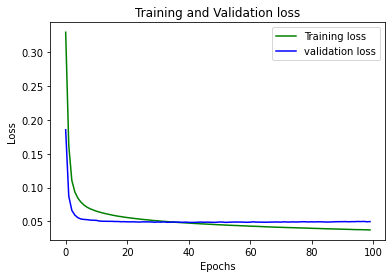

In [ ]:
trainer.train(num_epochs=100, lr=0.0001, weight_decay=None)

In [ ]:
output=trainer.gene_dataset.data

In [ ]:
adata_di=adata.copy()
output = np.array(output, dtype=float)
adata_di.X = output


----

#Quality check after scScope

In [ ]:
a1=adata.copy()
a2=adata_di.copy()
sc.pp.calculate_qc_metrics(a1, percent_top=None, log1p=False, inplace=True)
sc.pp.calculate_qc_metrics(a2, percent_top=None, log1p=False, inplace=True)

... storing 'CellType' as categorical


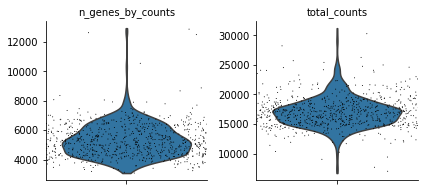

... storing 'CellType' as categorical


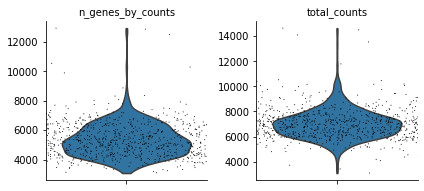

In [ ]:
sc.pl.violin(a1, ['n_genes_by_counts', 'total_counts'],jitter=0.7, multi_panel=True)
sc.pl.violin(a2, ['n_genes_by_counts', 'total_counts'], jitter=0.7, multi_panel=True)

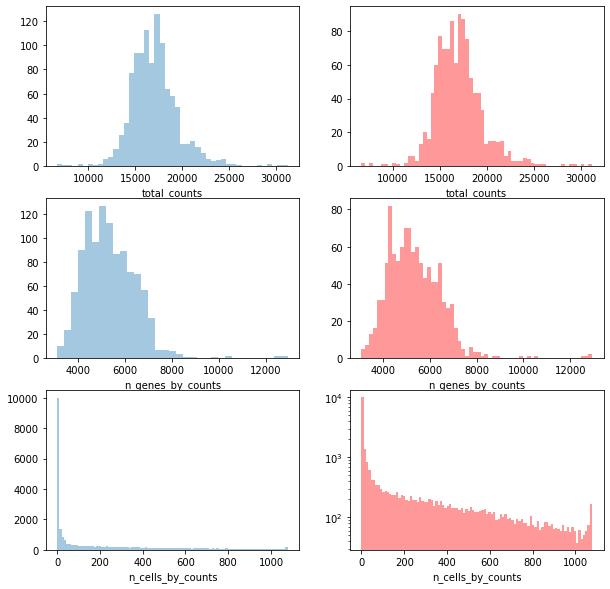

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(10,10))
sns.distplot(a1.obs["total_counts"], kde=False, ax=axs[0,0])
sns.distplot(a1.obs["total_counts"], kde=False, bins=60, color= 'red', ax=axs[0,1])
sns.distplot(a2.obs["n_genes_by_counts"], kde=False, ax=axs[1,0])
sns.distplot(a2.obs["n_genes_by_counts"], kde=False, bins=60, color= 'red', ax=axs[1,1])
sns.distplot(a1.var["n_cells_by_counts"], kde=False,bins=100,  ax=axs[2,0])
plt.yscale('log') 
sns.distplot(a2.var["n_cells_by_counts"], kde=False, color= 'red',bins=100, ax=axs[2,1])
plt.yscale('log') 

#Principal Component analysis on datasets


... storing 'CellType' as categorical


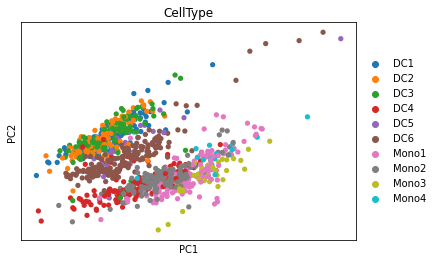

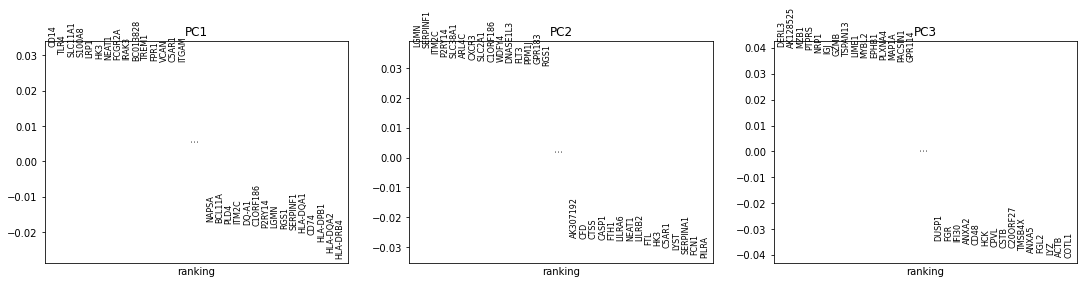

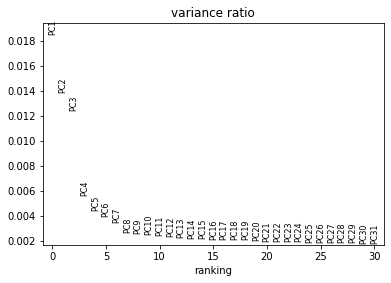

In [ ]:
sc.pp.log1p(adata)
sc.pp.scale(adata)
sc.pp.pca(adata) 
sc.pl.pca_overview(adata, color='CellType')

... storing 'CellType' as categorical


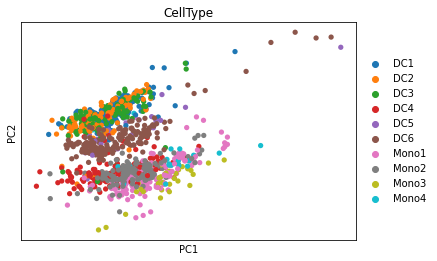

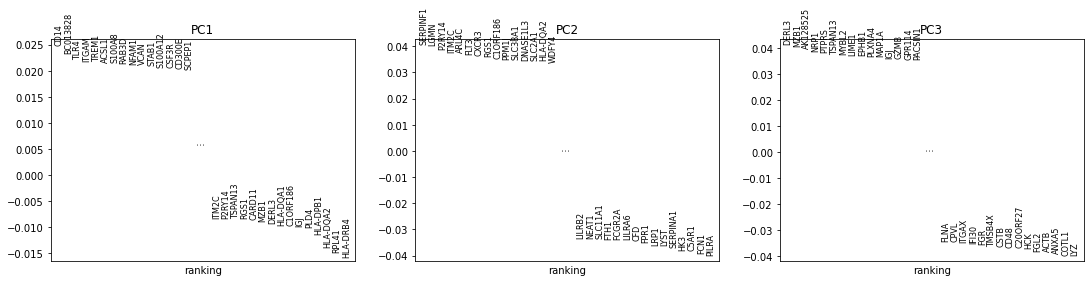

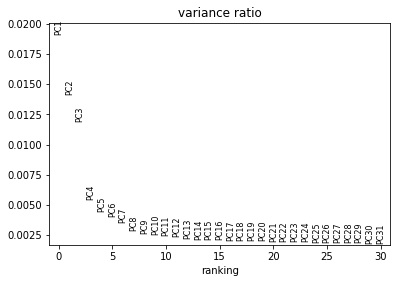

In [ ]:
sc.pp.log1p(adata_di)
sc.pp.scale(adata_di)
sc.pp.pca(adata_di) 
sc.pl.pca_overview(adata_di, color='CellType')

#Dimensionality reduction

#1. tSNE 
visualing the data using tSNE before and after the model

In [ ]:
q1=adata.copy()
q2=adata_di.copy()

         Falling back to preprocessing with `sc.pp.pca` and default params.


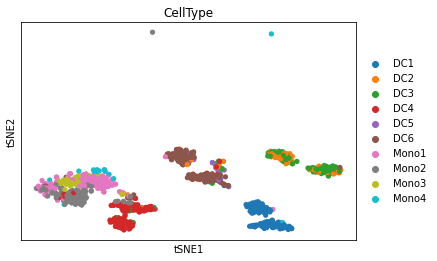

... storing 'CellType' as categorical


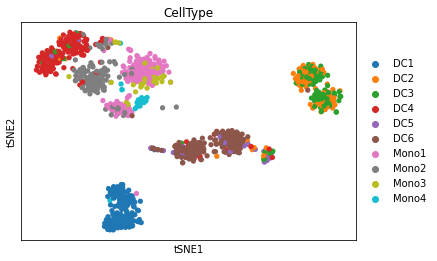

In [ ]:
sc.tl.tsne(q1, perplexity=30, learning_rate=1000, random_state=0)
sc.tl.tsne(q2, perplexity=30, learning_rate=1000, random_state=0)
sc.pl.tsne(q1, color='CellType')
sc.pl.tsne(q2, color='CellType')

#2. UMAP
visualing the data using UMAP before and after the model




         Falling back to preprocessing with `sc.pp.pca` and default params.


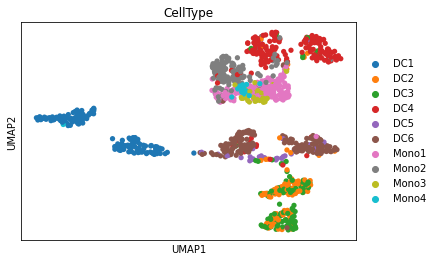

... storing 'CellType' as categorical


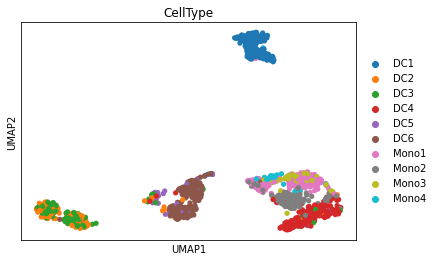

In [ ]:
sc.pp.neighbors(adata)
sc.tl.umap(adata, min_dist=0.5, spread=1.0, random_state=1, n_components=2)

sc.pp.neighbors(adata_di)
sc.tl.umap(adata_di, min_dist=0.5, spread=1.0, random_state=1, n_components=2)

sc.pl.umap(adata, color='CellType')
sc.pl.umap(adata_di, color='CellType')

#CLustering Analysis - using K-means


... storing 'kmeans' as categorical


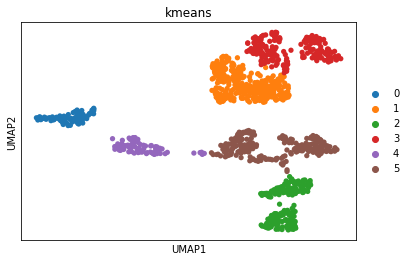

In [ ]:
umap_coordinates = adata.obsm['X_umap'] 
kmeans = KMeans(n_clusters=6, random_state=0).fit(umap_coordinates) 

adata.obs['kmeans'] = kmeans.labels_ 
adata.obs['kmeans'] = adata.obs['kmeans'].astype(str)

sc.pl.umap(adata, color='kmeans') 

In [ ]:
rand_index = adjusted_rand_score(labels_true = adata.obs['CellType'], labels_pred = adata.obs['kmeans'])
print('The Rand index is', round(rand_index, 2))

The Rand index is 0.53


... storing 'kmeans' as categorical


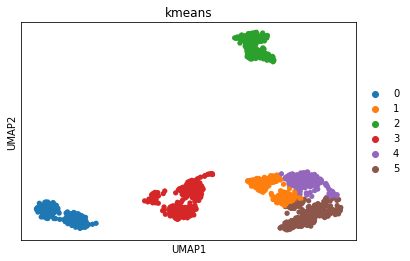

In [ ]:
umap_coordinates = adata_di.obsm['X_umap'] 
kmeans = KMeans(n_clusters=6, random_state=0).fit(umap_coordinates) 

adata_di.obs['kmeans'] = kmeans.labels_ 
adata_di.obs['kmeans'] = adata_di.obs['kmeans'].astype(str)

sc.pl.umap(adata_di, color='kmeans') 

In [ ]:
rand_index = adjusted_rand_score(labels_true = adata_di.obs['CellType'], labels_pred = adata_di.obs['kmeans'])
print('The Rand index is', round(rand_index, 2))

The Rand index is 0.62


#Additional visualisations to see effect of the model on the data:

# 1. TracksPlot


/usr/local/lib/python3.6/dist-packages/scanpy/tools/_rank_genes_groups.py:252: RuntimeWarning: invalid value encountered in log2
  rankings_gene_logfoldchanges.append(np.log2(foldchanges[global_indices]))


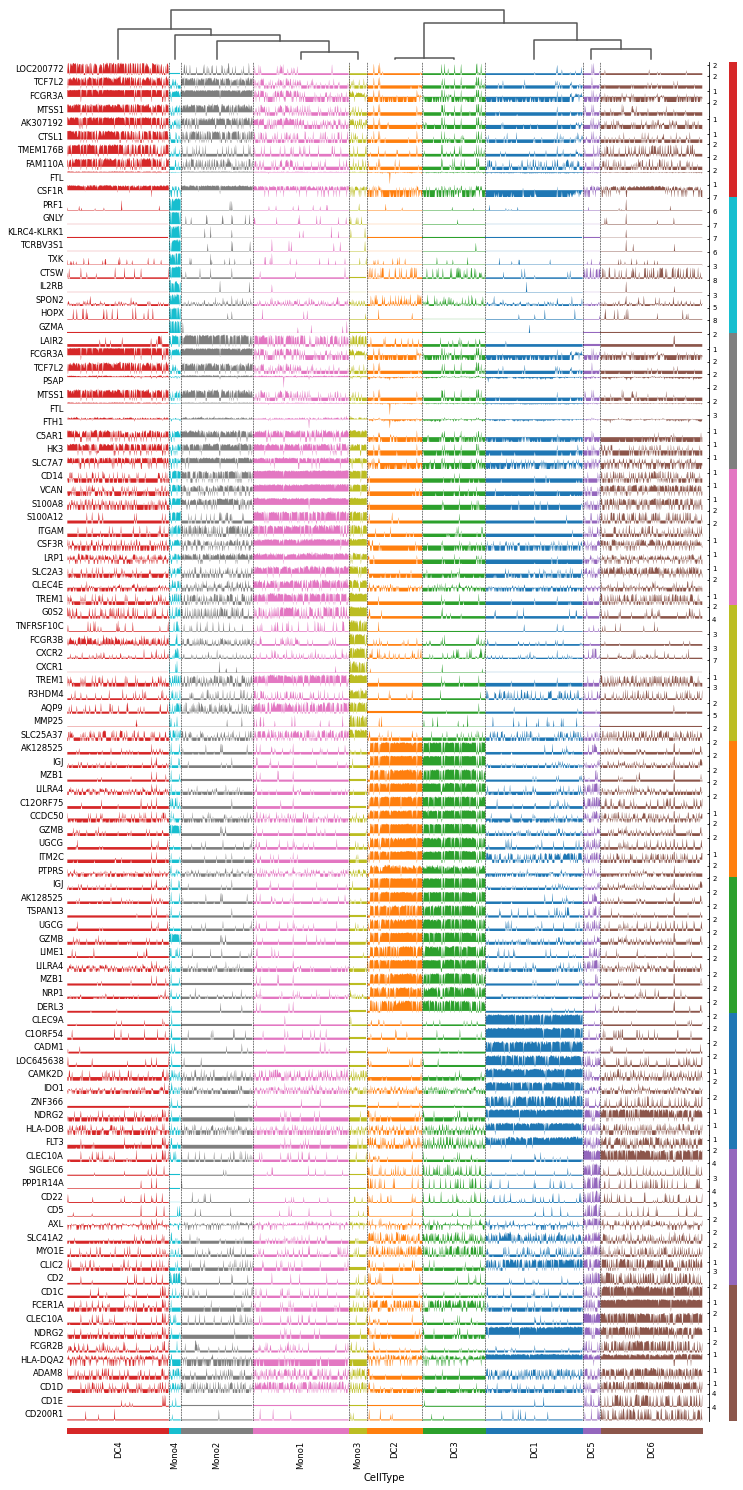

In [ ]:
sc.tl.rank_genes_groups(adata, groupby='CellType', use_raw=True, method='t-test_overestim_var', n_genes=10) # compute differential expression
sc.pl.rank_genes_groups_tracksplot(adata, groupby='CellType') # plot the result

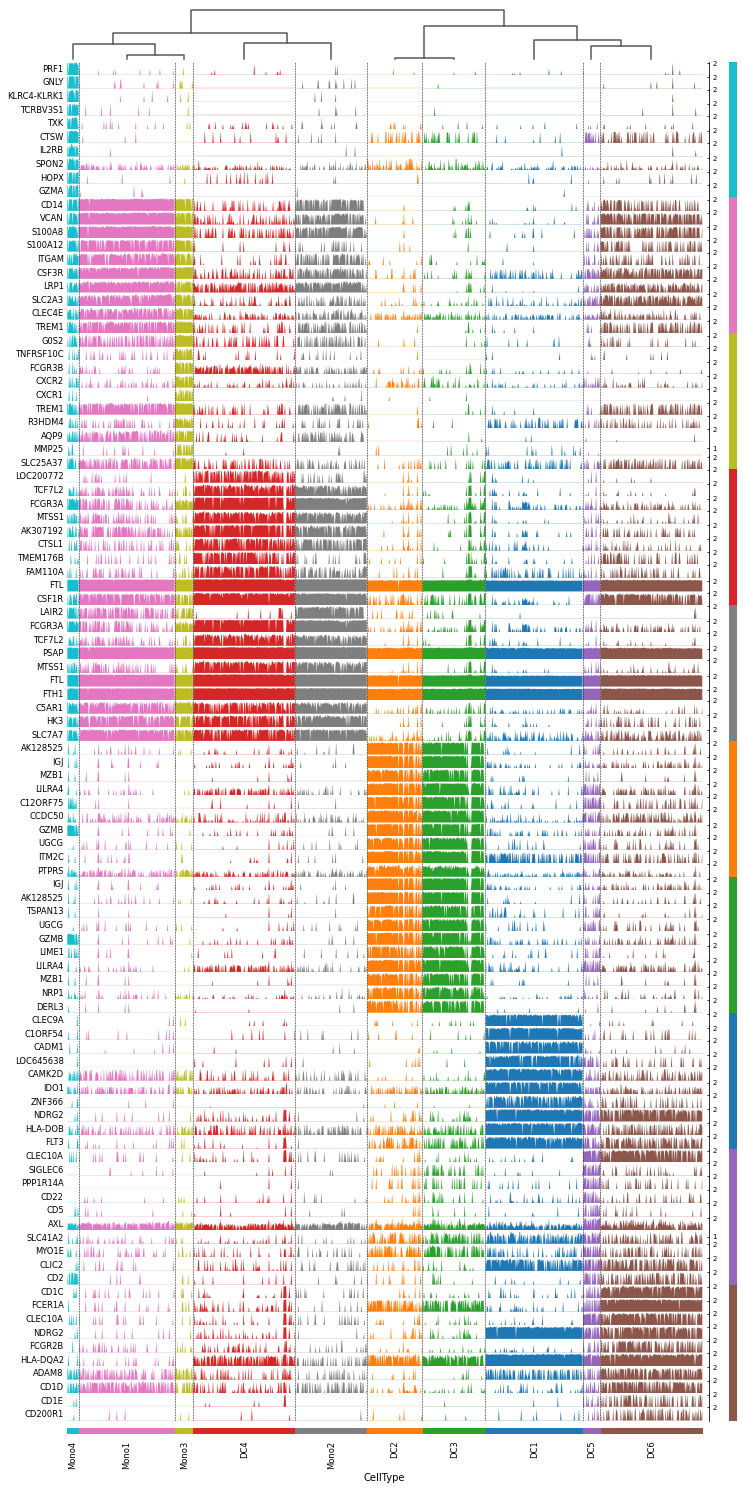

In [ ]:
sc.tl.rank_genes_groups(adata_di, groupby='CellType', use_raw=True, method='t-test_overestim_var', n_genes=10) # compute differential expression
sc.pl.rank_genes_groups_tracksplot(adata_di, groupby='CellType') # plot the result

# 2. Heatmaps

These hetamps clearly show that the missing values are being imputed by Deep Impute without distrubing the cell cluster patterns

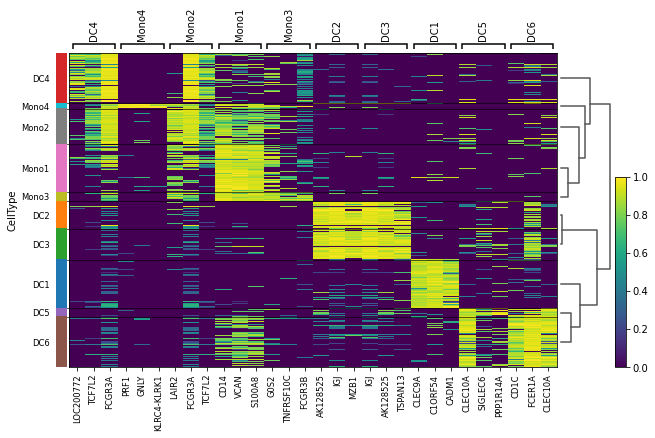

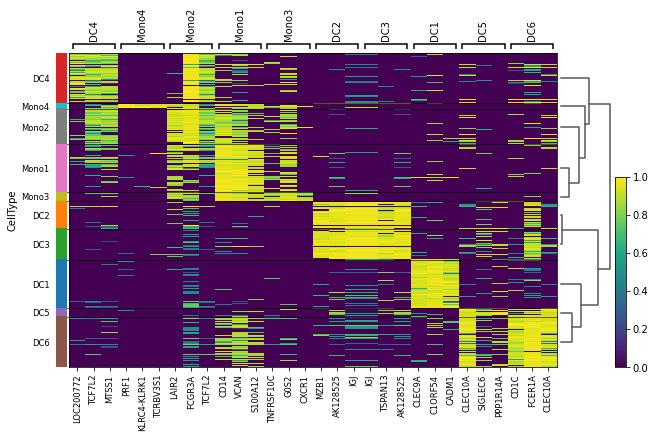

In [ ]:
sc.pl.rank_genes_groups_heatmap(adata, n_genes=3, standard_scale='var')
sc.pl.rank_genes_groups_heatmap(adata_di, n_genes=3, standard_scale='var')

#Conclusions

Deep Impute effectively imputes the data having 0 gene expression level to improvise the clustering. This model can be proven as an effective way to improvise the clustering score